# calibration MASK

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
from pyaxions import spectools as sp
import importlib
plt.rcParams["figure.figsize"] = (20,10)

In [29]:
f  = pa.findmfiles('out')
logi = pa.gml(f ,'logi') 
ct   = pa.gml(f ,'ct') 
# st  = pa.stringo(f)
f[-1]

'out/m/axion.m.00009'

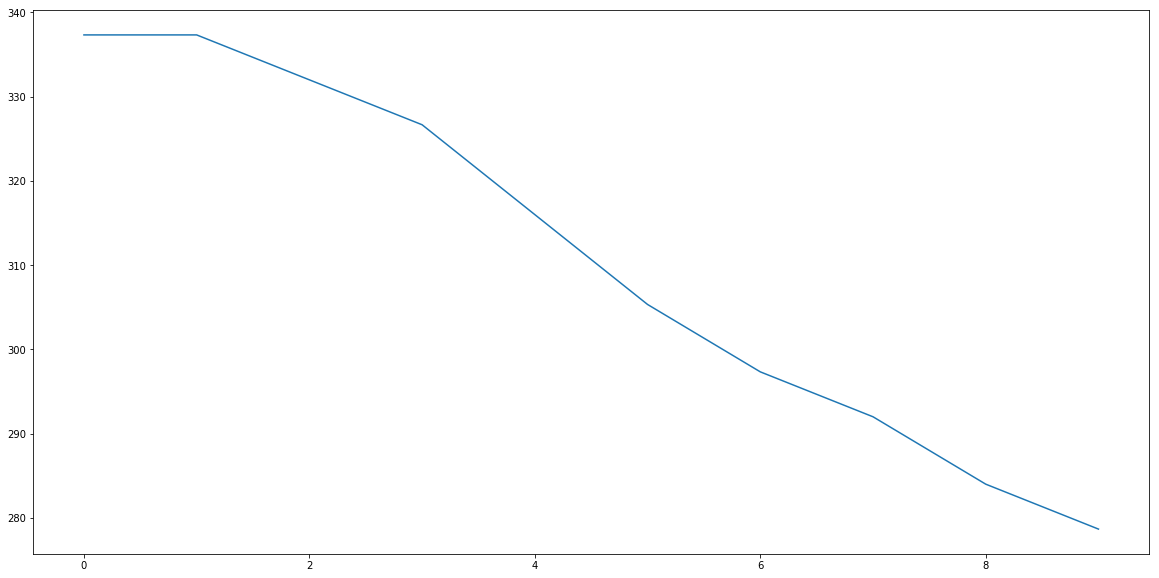

In [41]:
plt.plot(pa.gml(f,'stringN')*2/3)

# Setup
First I run with a defined set of settings that control the mask width

vil, vil2 are natural maskings and are fixed

RED is filtered with $\sigma =$ radius_mask, which is defined in lattice units

In [37]:
msa = pa.gm(f[0],'msa')
msa

0.75

In [31]:
mid=-1
lis=pa.gm(f[mid],'msp_info')
lis

['W_Dif_0.50',
 'W_Dif_0.75',
 'W_Dif_1.00',
 'W_Dif_1.25',
 'W_Dif_1.50',
 'W_Dif_1.75',
 'W_Dif_2.00',
 'W_Dif_2.25',
 'W_Dif_2.50',
 'W_Dif_2.75',
 'W_Dif_3.00',
 'W_Dif_3.50',
 'W_Dif_4.00',
 'W_Dif_5.00',
 'W_Dif_6.00',
 'W_Dif_7.00',
 'W_Dif_8.00',
 'W_Dif_9.00',
 'W_Gau_0.50',
 'W_Gau_0.75',
 'W_Gau_1.00',
 'W_Gau_1.25',
 'W_Gau_1.50',
 'W_Gau_1.75',
 'W_Gau_2.00',
 'W_Gau_2.25',
 'W_Gau_2.50',
 'W_Gau_2.75',
 'W_Gau_3.00',
 'W_Gau_3.50',
 'W_Gau_4.00',
 'W_Gau_5.00',
 'W_Gau_6.00',
 'W_Gau_7.00',
 'W_Gau_8.00',
 'W_Gau_9.00',
 'W_Red_0.50',
 'W_Red_0.75',
 'W_Red_1.00',
 'W_Red_1.25',
 'W_Red_1.50',
 'W_Red_1.75',
 'W_Red_2.00',
 'W_Red_2.25',
 'W_Red_2.50',
 'W_Red_2.75',
 'W_Red_3.00',
 'W_Red_3.50',
 'W_Red_4.00',
 'W_Red_5.00',
 'W_Red_6.00',
 'W_Red_7.00',
 'W_Red_8.00',
 'W_Red_9.00',
 'W_Vi',
 'W_Vi2']

# Gaussian REDO

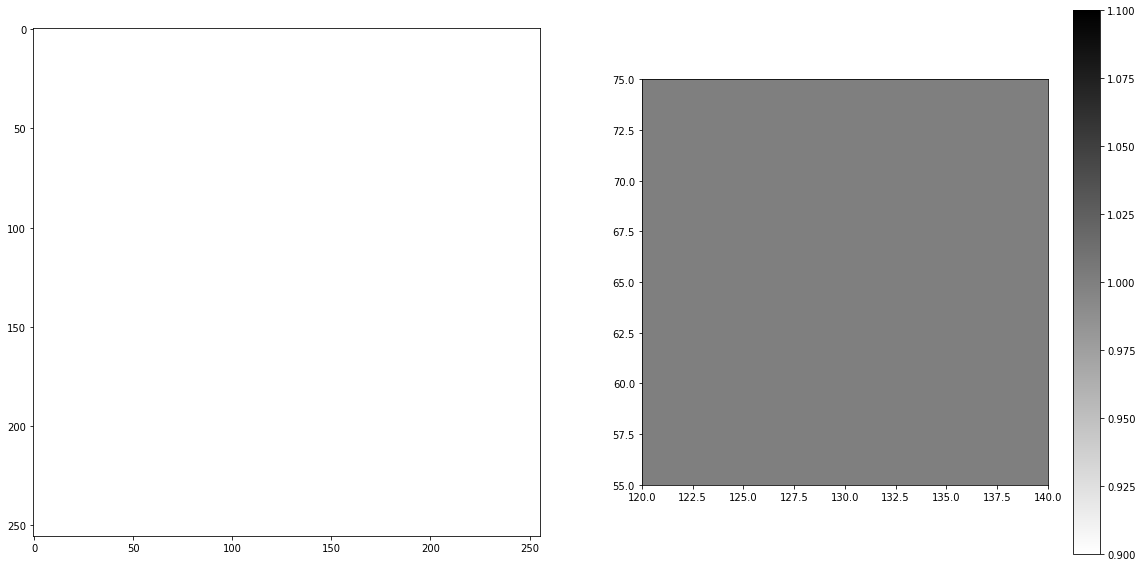

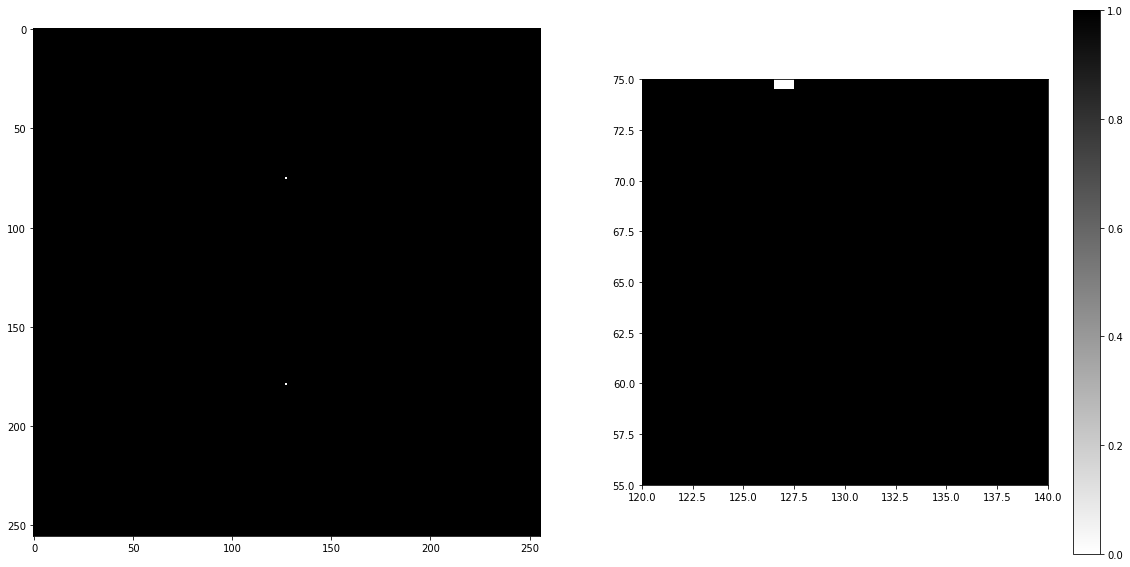

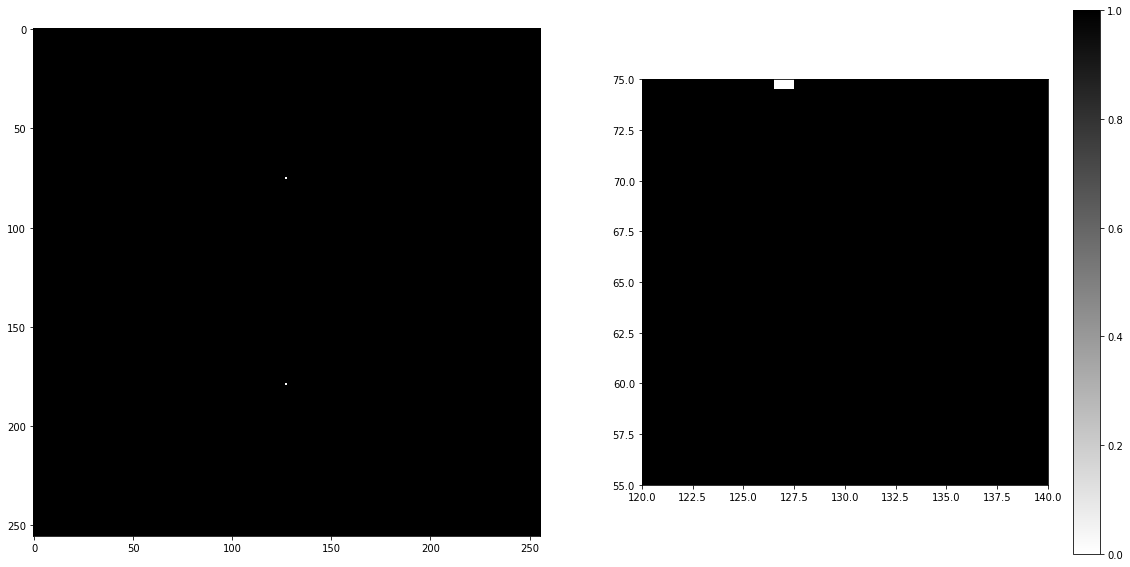

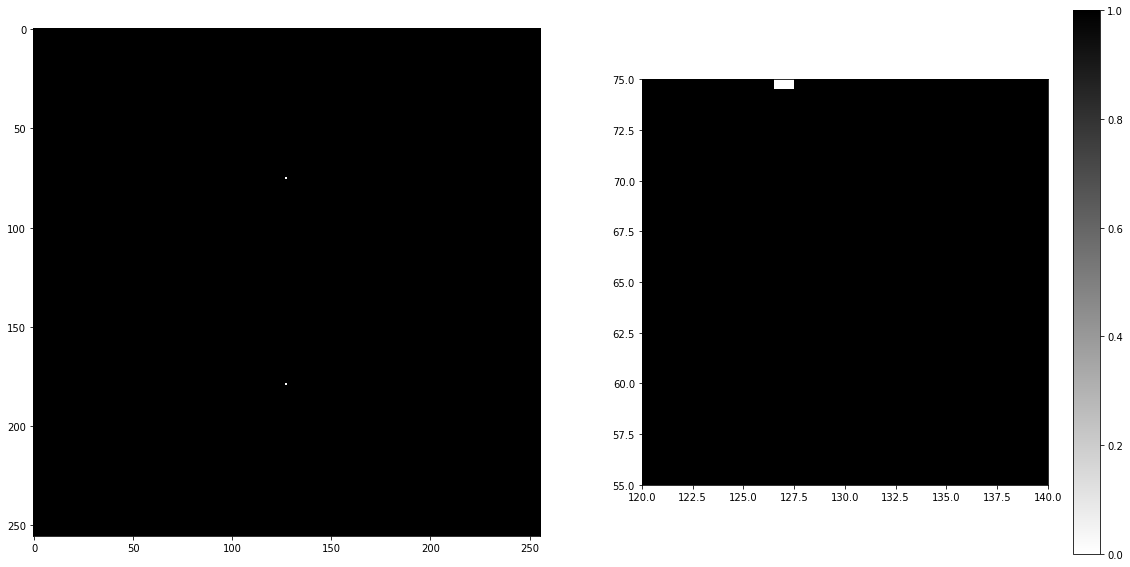

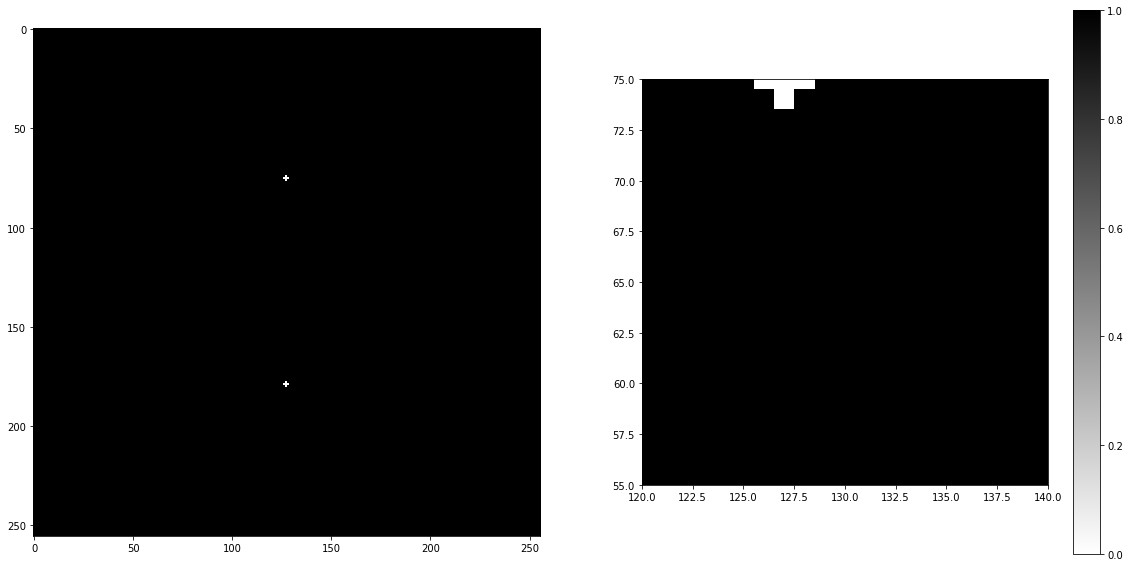

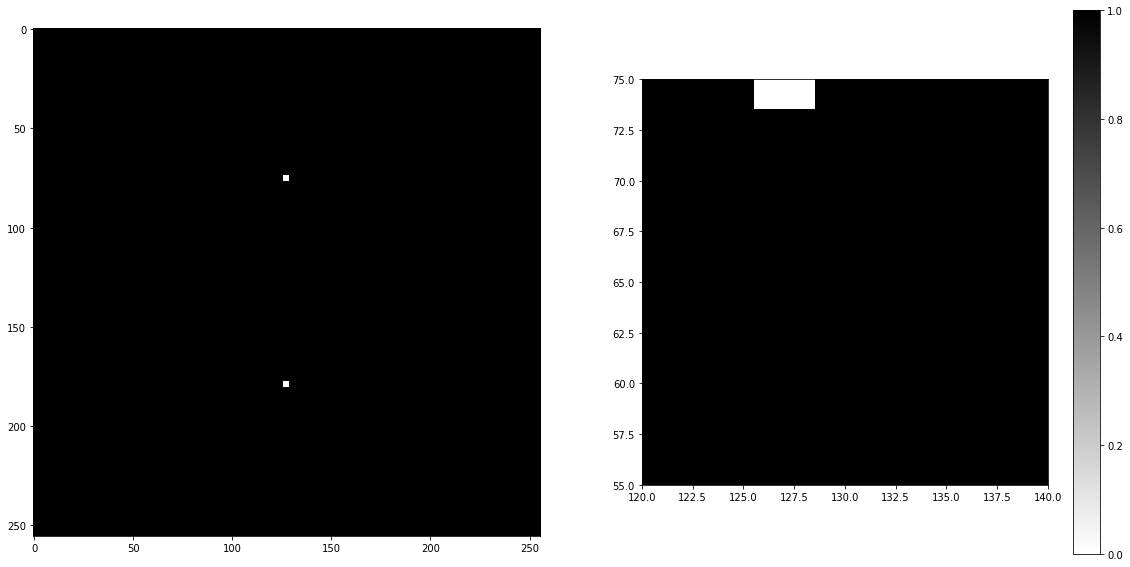

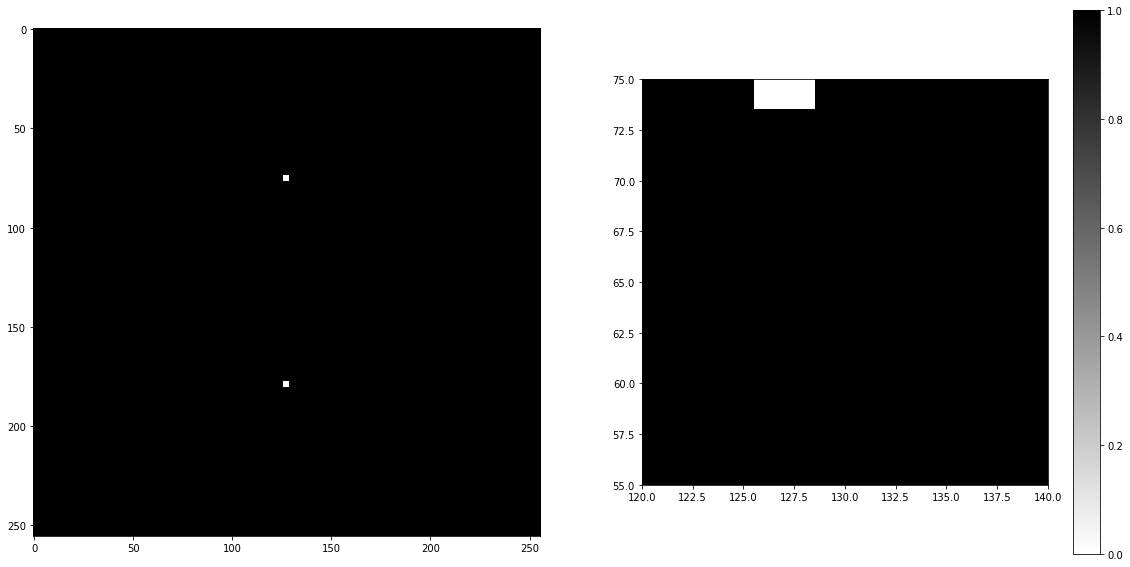

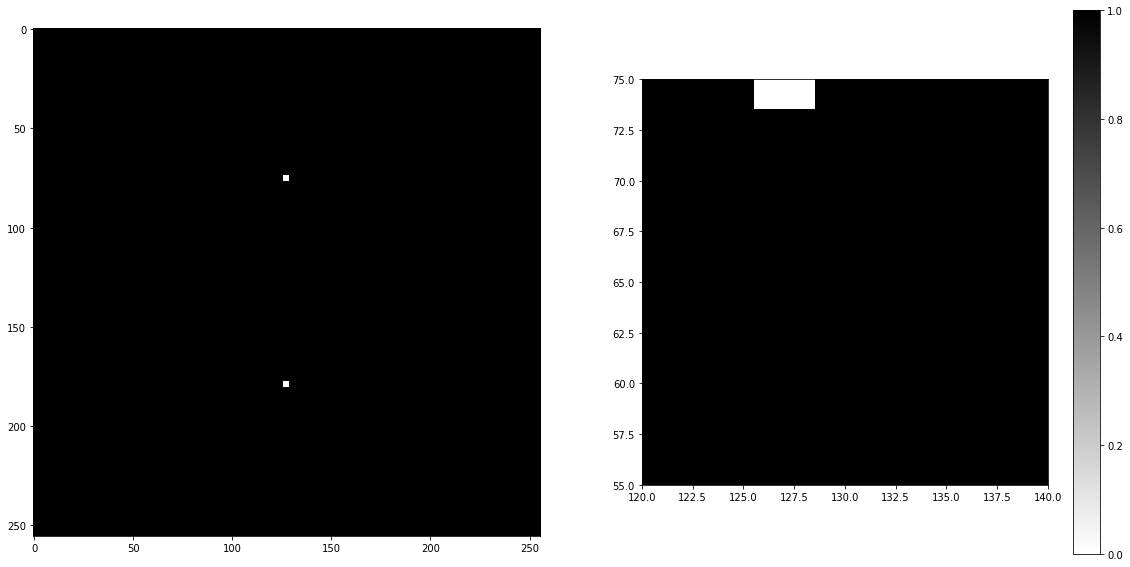

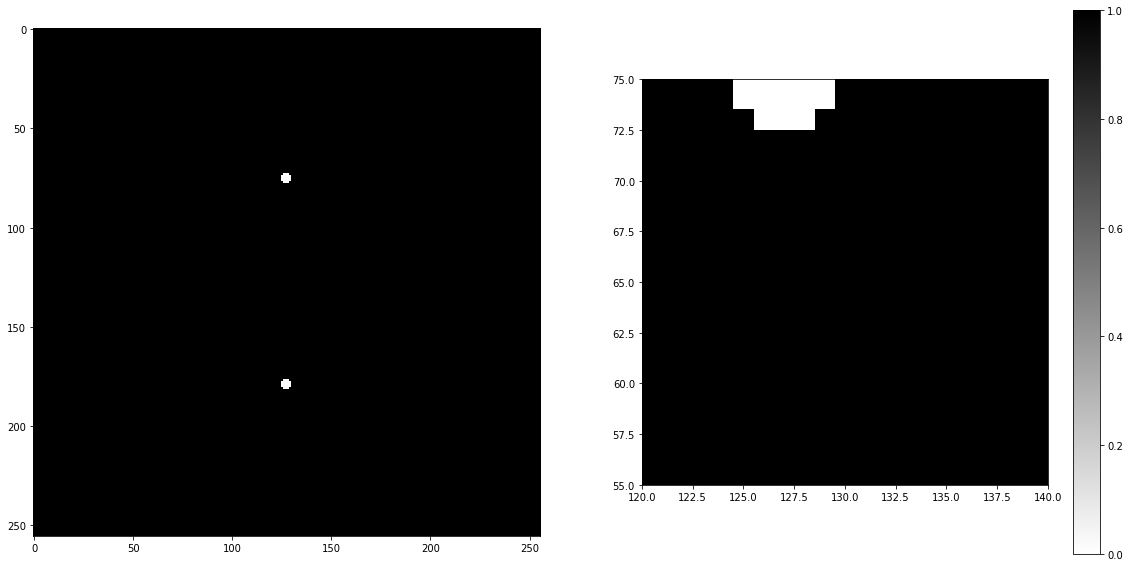

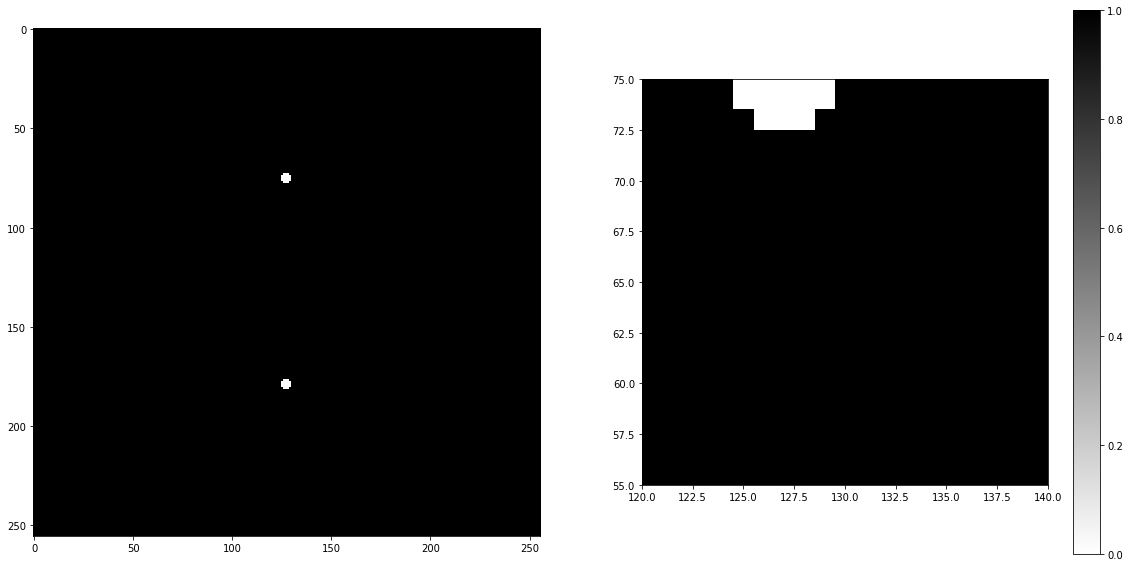

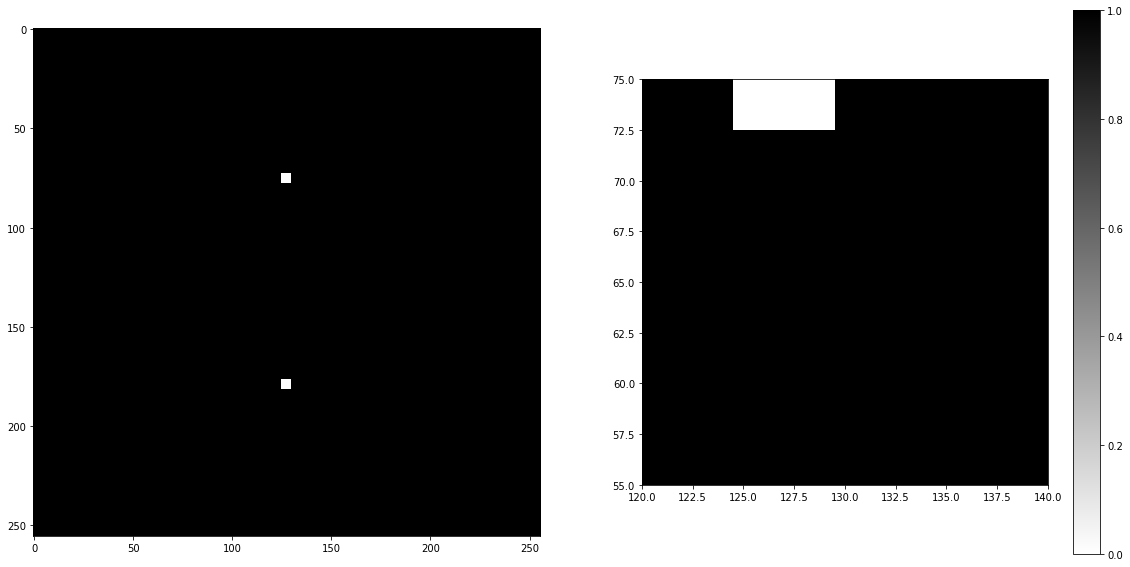

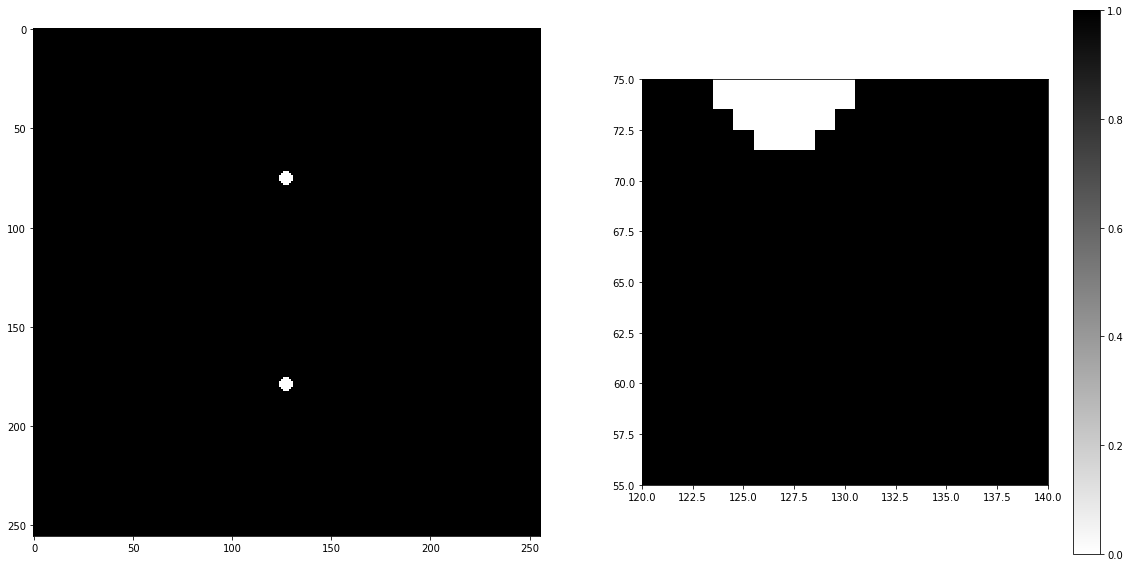

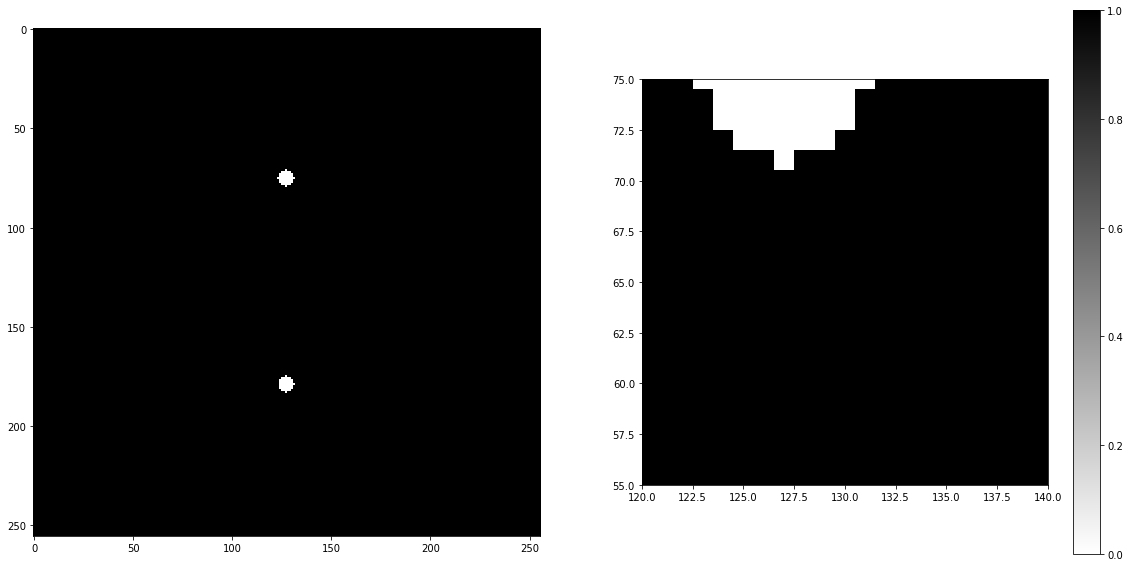

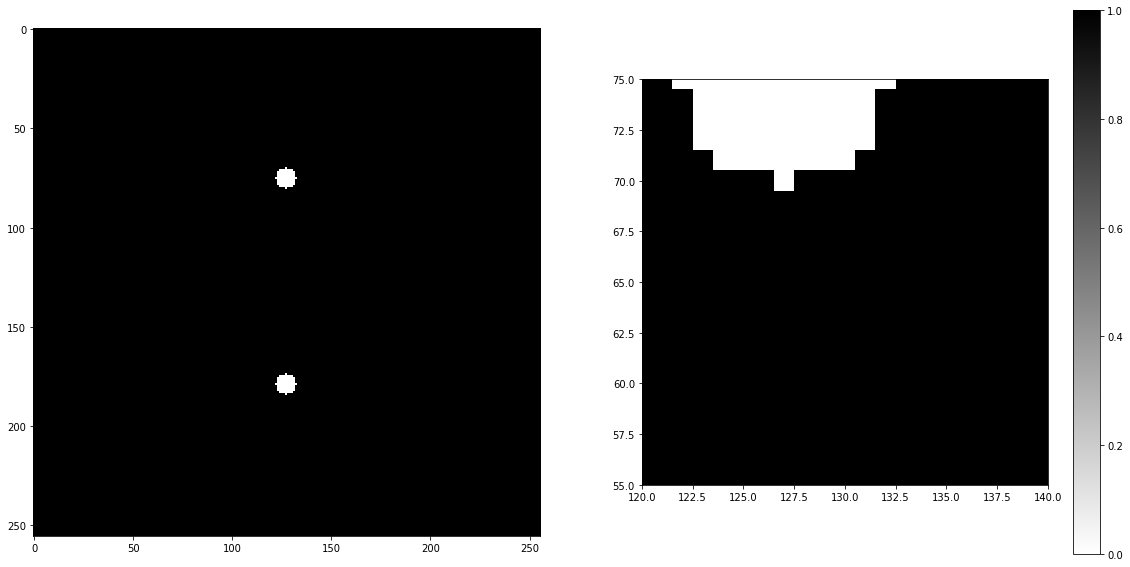

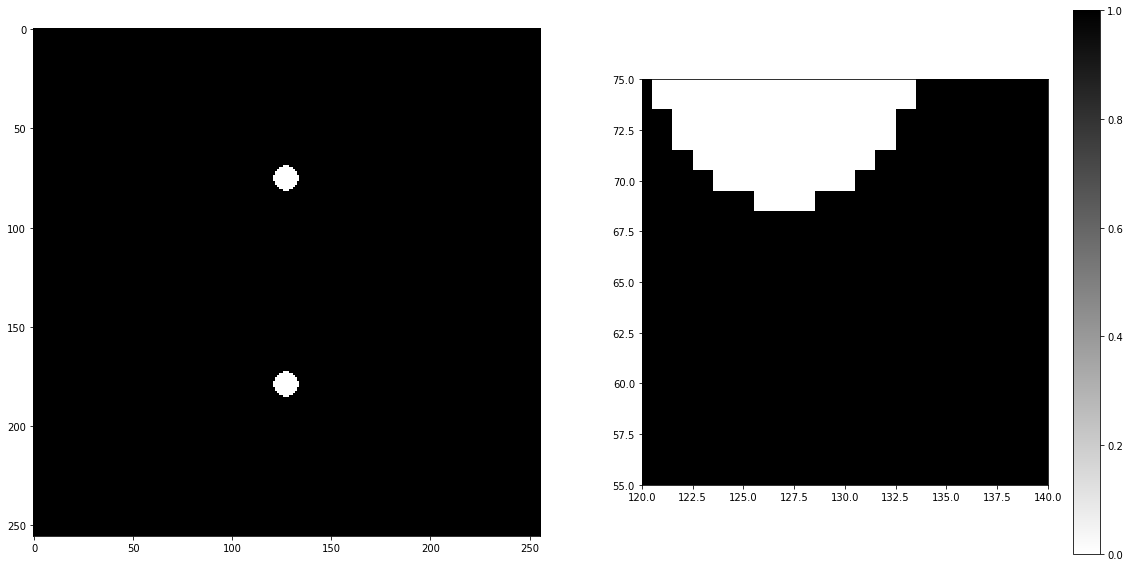

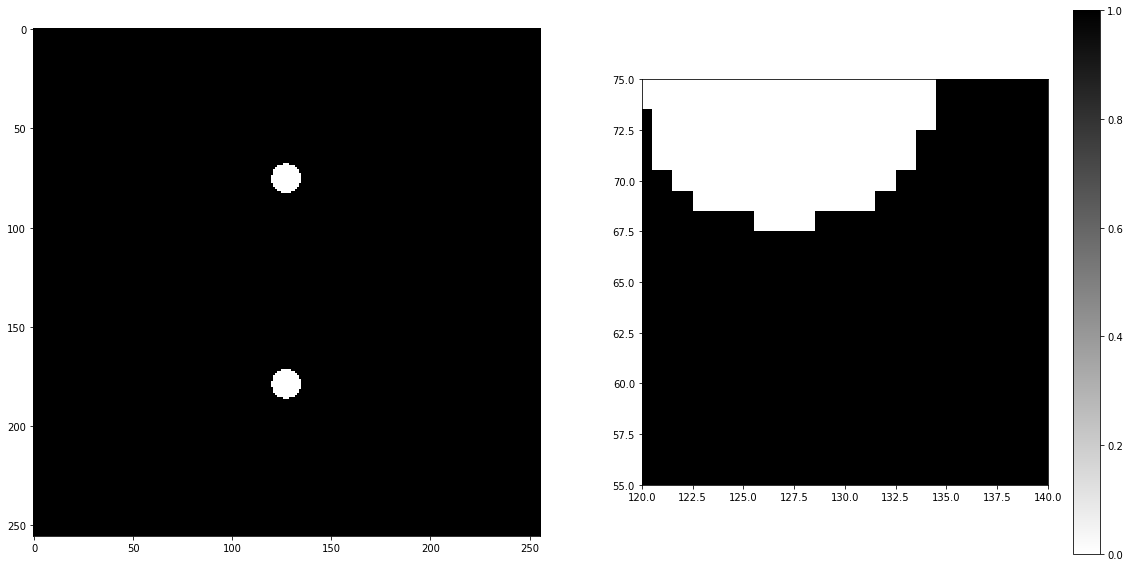

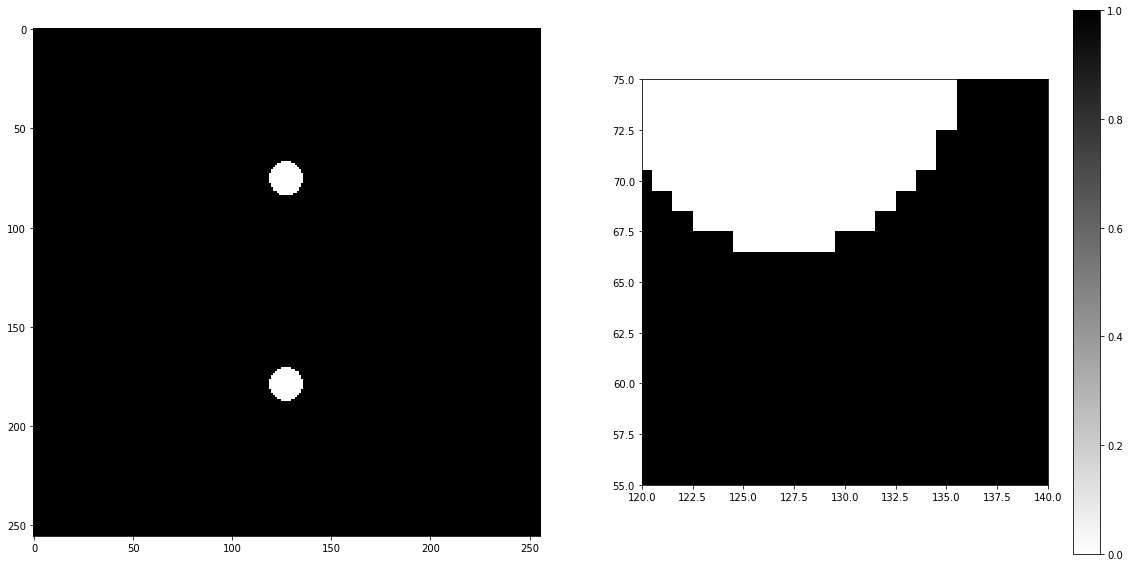

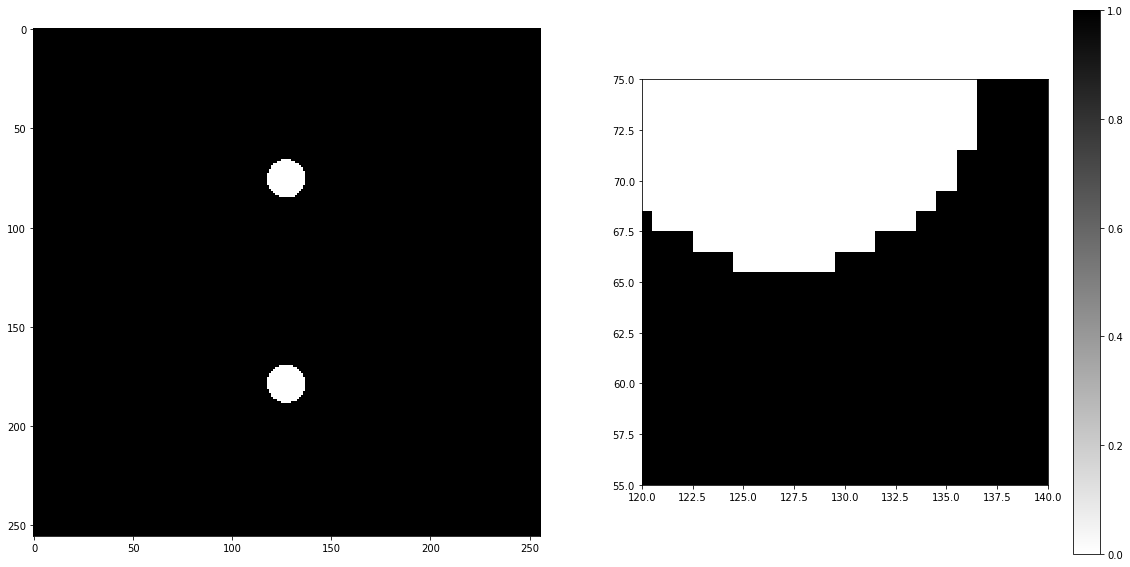

In [38]:
for st in lis:
    if (st[:3] == "W_R" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

1 - Data look reasonable

2 - Calibration in the perpendicular plane

3 - statistical calibration with length * pi * r^2

4 - Calibration with length and W0

5 - Calibration with string Length

In [39]:
rsize = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.5,4,5,6,7,8,9])
rsize/msa

array([ 0.66666667,  1.        ,  1.33333333,  1.66666667,  2.        ,
        2.33333333,  2.66666667,  3.        ,  3.33333333,  3.66666667,
        4.        ,  4.66666667,  5.33333333,  6.66666667,  8.        ,
        9.33333333, 10.66666667, 12.        ])

In [46]:
# the Ft0 is the sum mask
# we then square it and multiply it by L3/N6
mid=0
renorm=(pa.gm(f[mid],'sizeN')**6/pa.gm(f[mid],'L')**3)

sL = pa.gm(f[mid],'stringN')*2/3
print("String length is %f"%(sL))
print("Initial intended was %f"%(2*np.pi*pa.gm(f[mid],'sizeN')/4))

ma3D = pa.gm(f[mid],'sizeN')**3 - np.sqrt(pa.gm(f[mid],'mspW_Dif_0.50')[0]*renorm)
print(ma3D,ma3D/pa.gm(f[mid],'sizeN')**3)
print('Points per Unit length = ma3D/(2 pi N/4) = %f'%(ma3D/(np.pi*256/2)))


String length is 337.333333
Initial intended was 402.123860
1355.0 8.07642936706543e-05
Points per Unit length = ma3D/(2 pi N/4) = 3.369609


In [47]:
pa.gm(f[mid],'stDens')

0.0022876880787037037

In [48]:
pusR=[]
for st in lis:
    if (st[:3] == "W_R" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = pa.gm(f[mid],'sizeN')**3 - np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusR.append([(a == 0).sum(),ma3D/(sL)])
        
pusR=np.array(pusR)

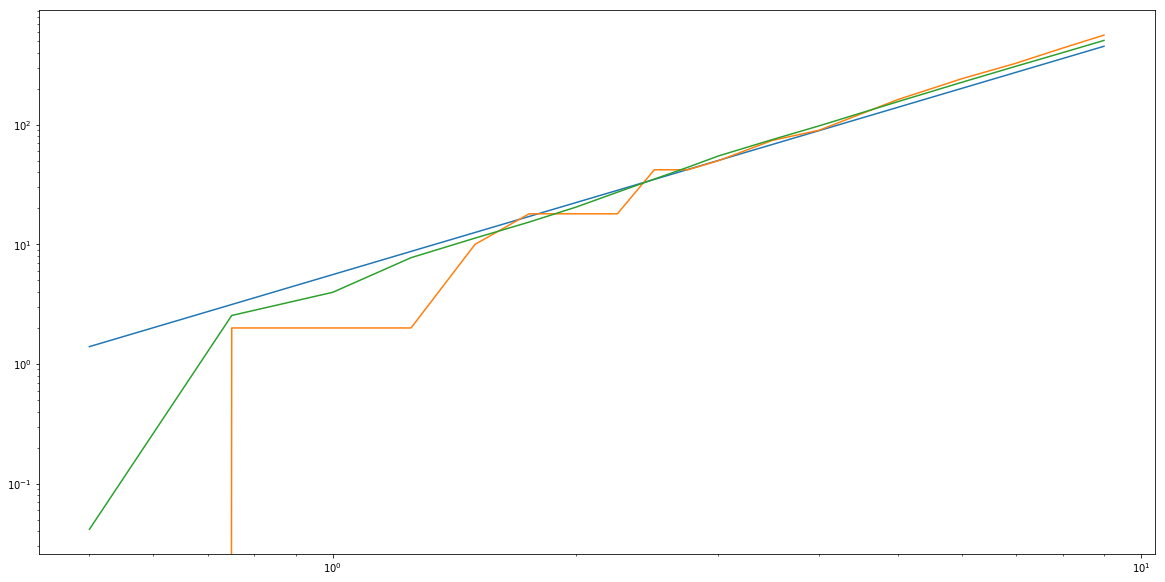

In [51]:
plt.loglog(rsize,np.pi*(rsize/msa)**2)
plt.loglog(rsize,pusR[:,0])
plt.loglog(rsize,pusR[:,1])

In [52]:
# The calibration is perfect already
# naturally it is not very good for small r

Text(0.5, 0, 'rmask [lattice units]')

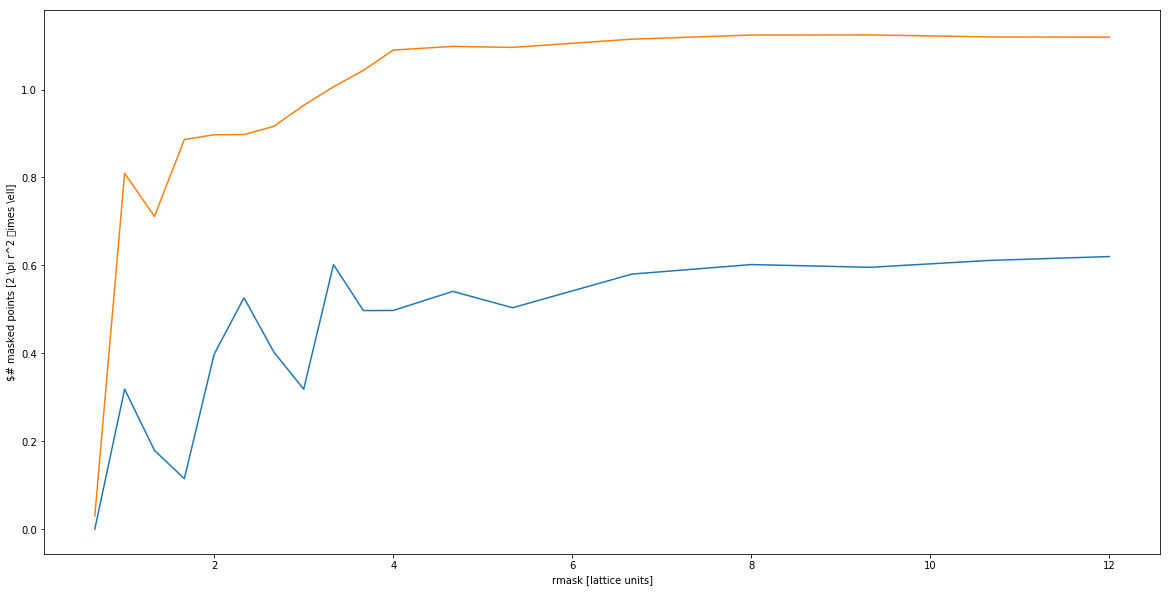

In [53]:
plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.ylabel('$# masked points [2 \pi r^2 \times \ell]')
plt.xlabel('rmask [lattice units]')

# For all values of time

In [55]:
f

array(['out/m/axion.m.00000', 'out/m/axion.m.00001',
       'out/m/axion.m.00002', 'out/m/axion.m.00003',
       'out/m/axion.m.00004', 'out/m/axion.m.00005',
       'out/m/axion.m.00006', 'out/m/axion.m.00007',
       'out/m/axion.m.00008', 'out/m/axion.m.00009'], dtype='<U19')

In [61]:
mpusR=[]
for i in range(len(f)):
    pusR=[]
    for st in lis:
        if (st[:3] == "W_R" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = pa.gm(f[i],'sizeN')**3 - np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusR.append([(a == 0).sum(),ma3D/(sL)])


    mpusR.append(pusR)
mpusR=np.array(mpusR)

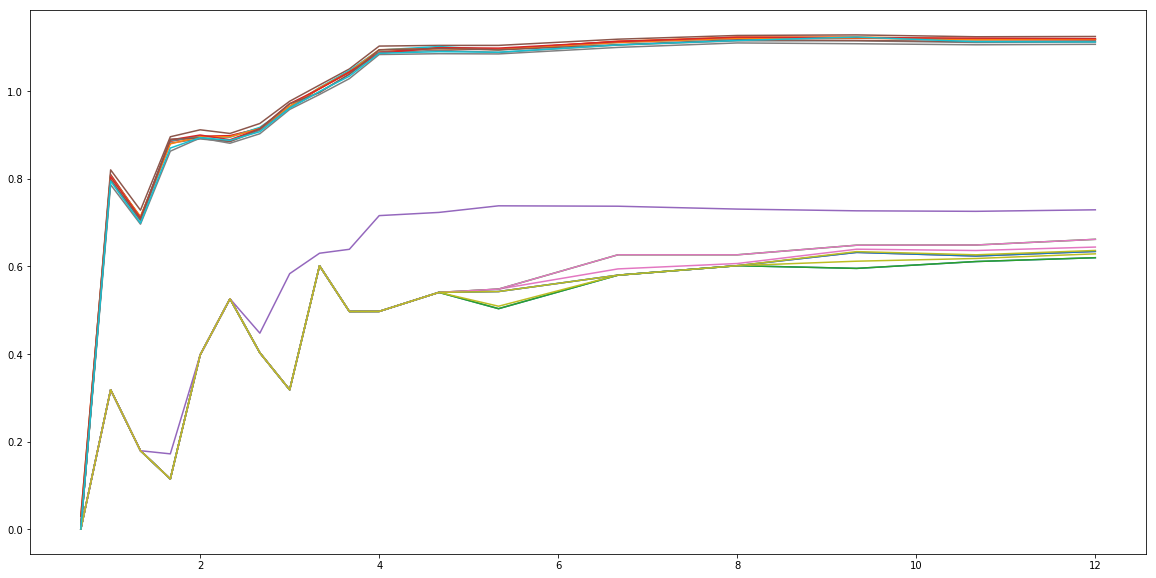

In [62]:
for pusR in mpusR:
    plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))

# Gau

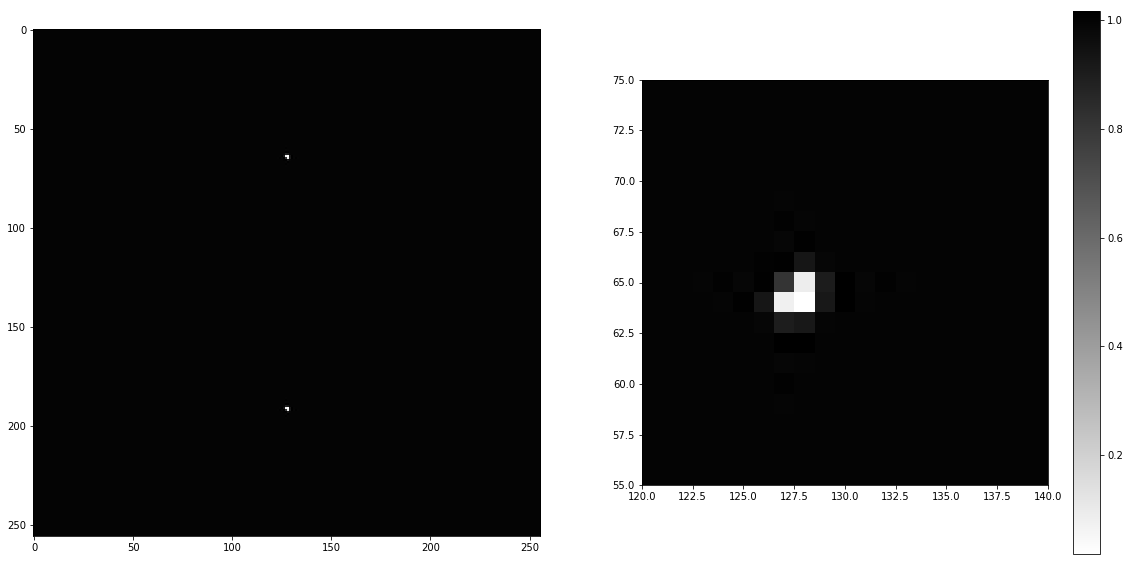

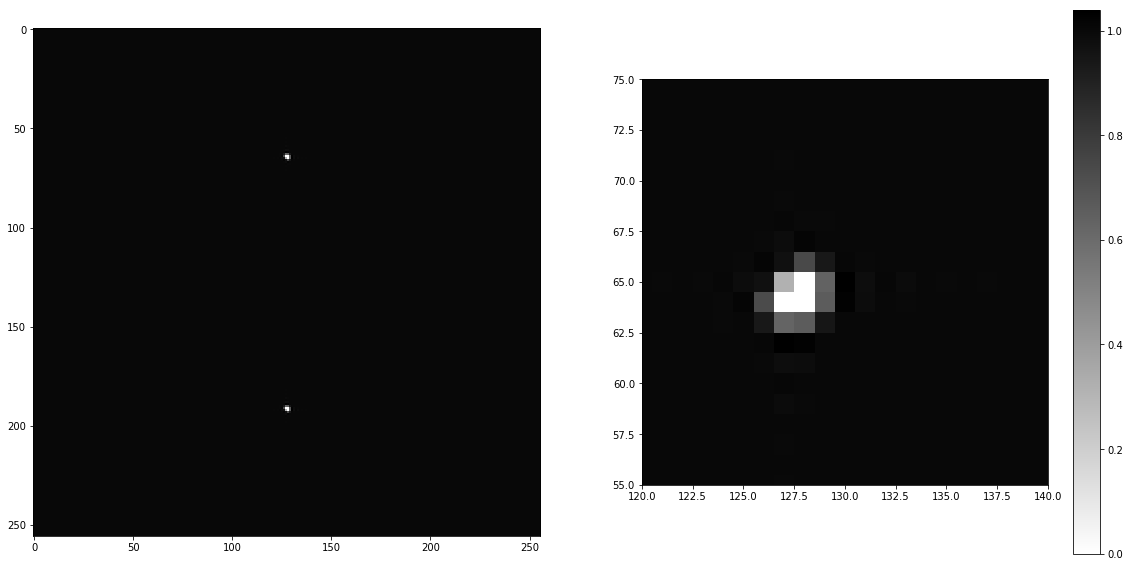

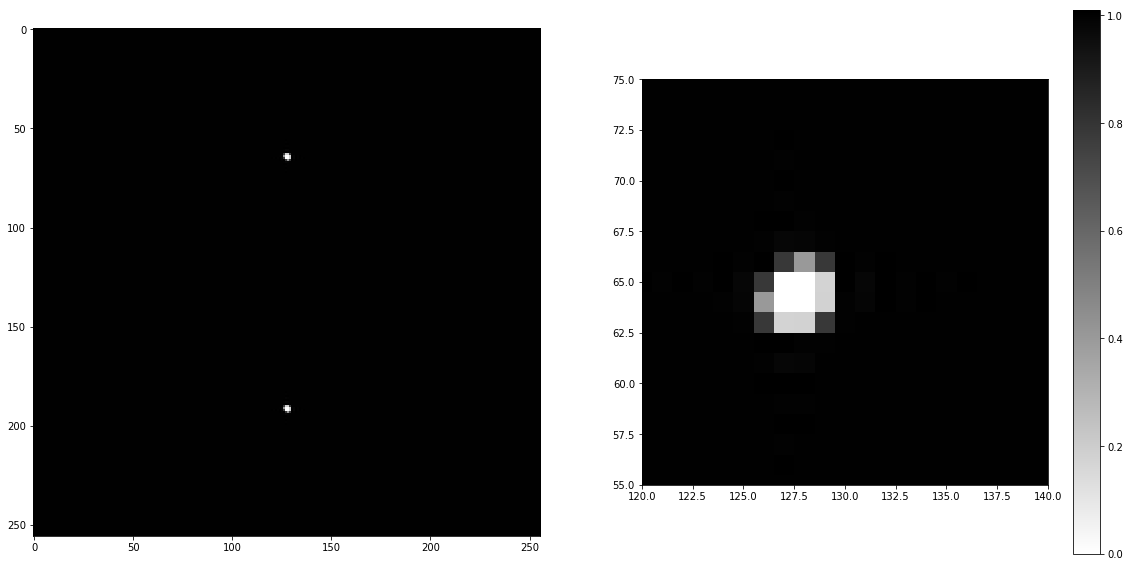

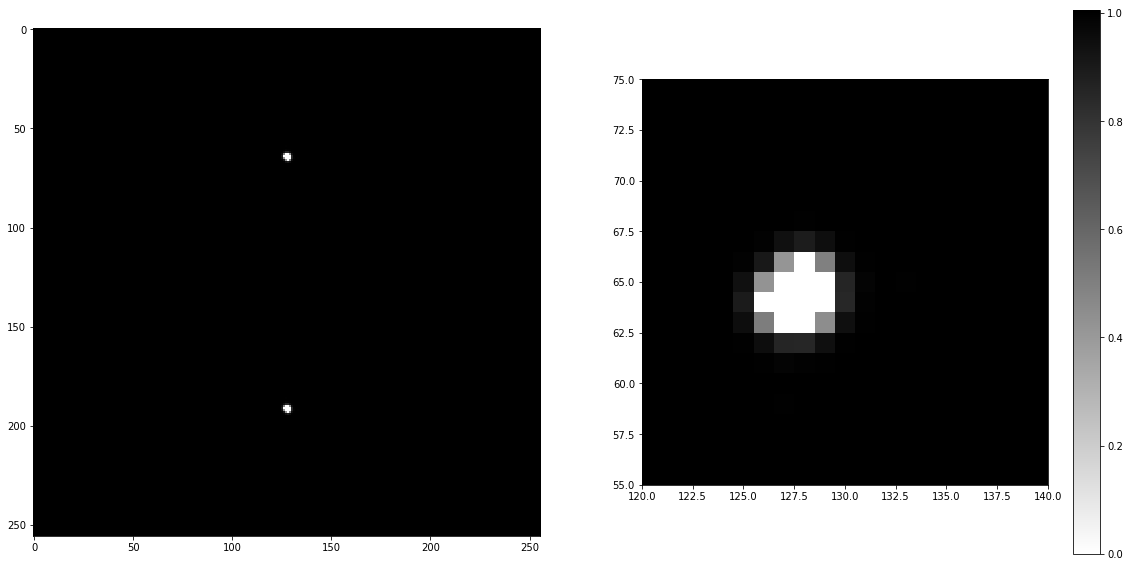

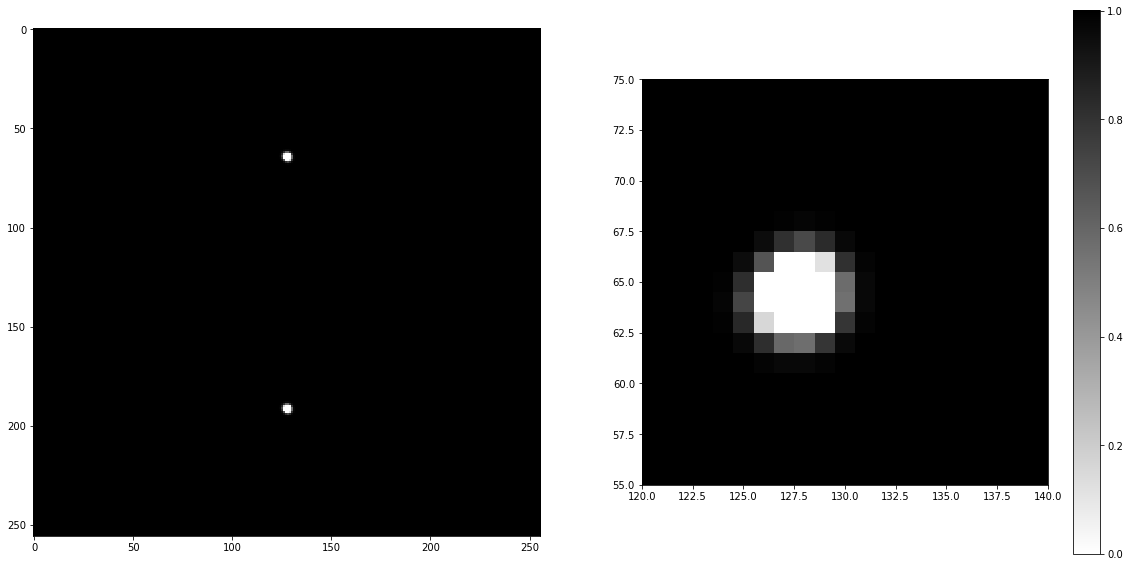

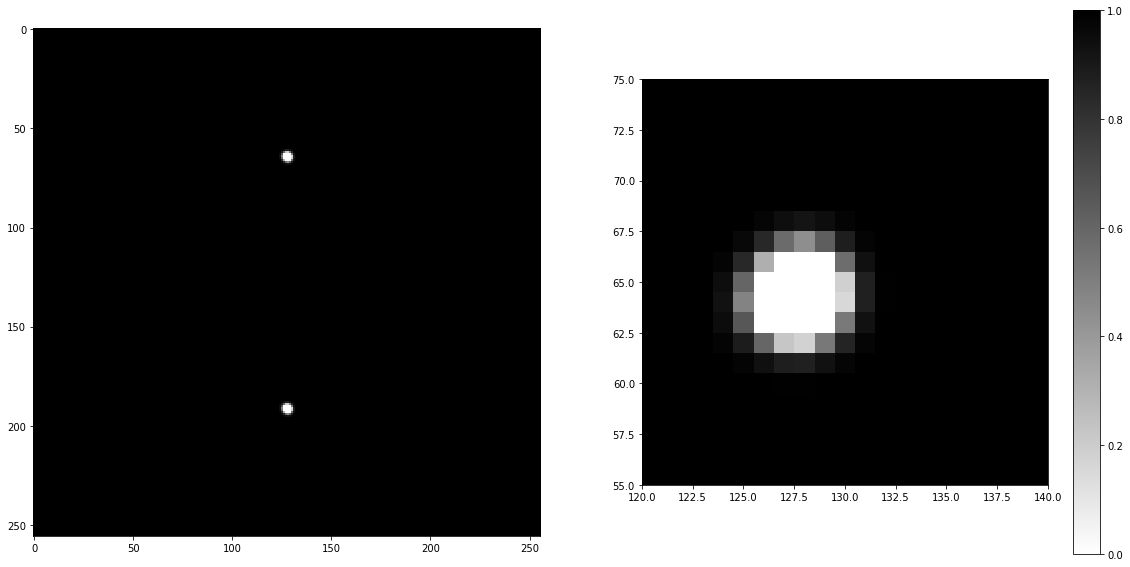

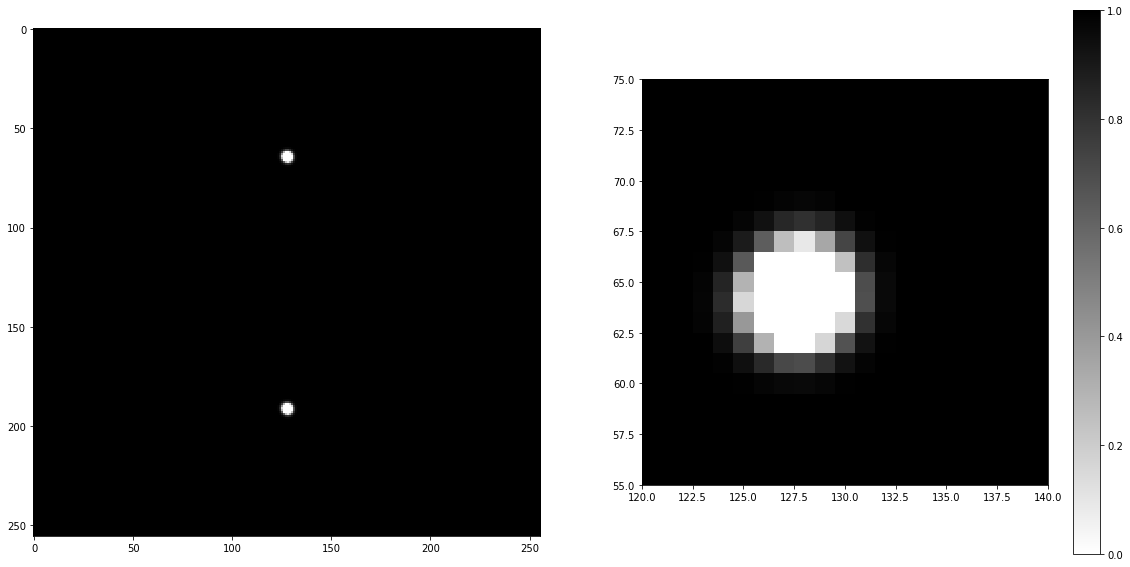

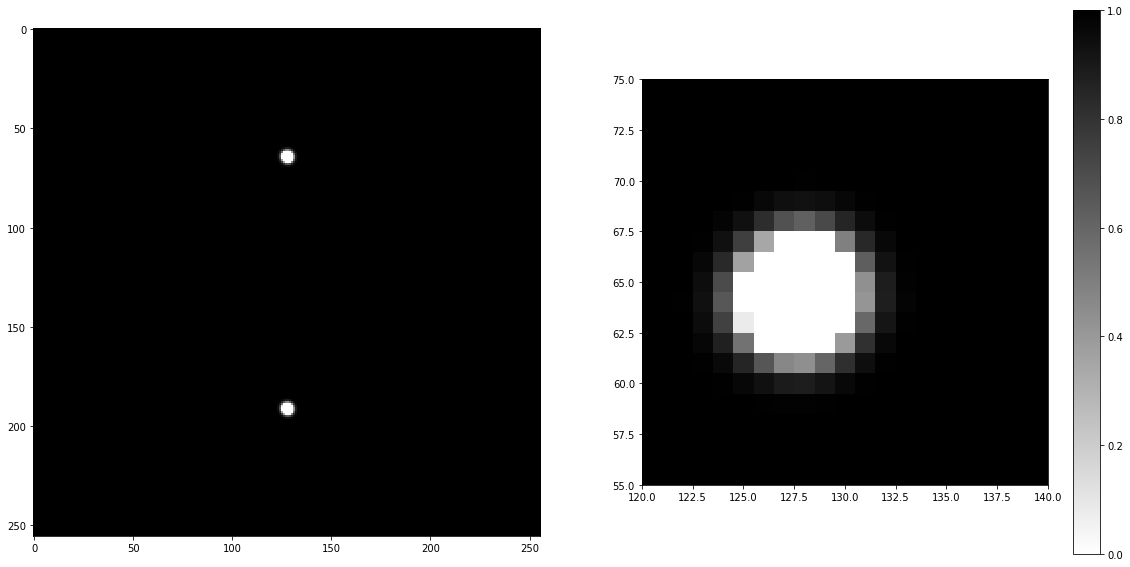

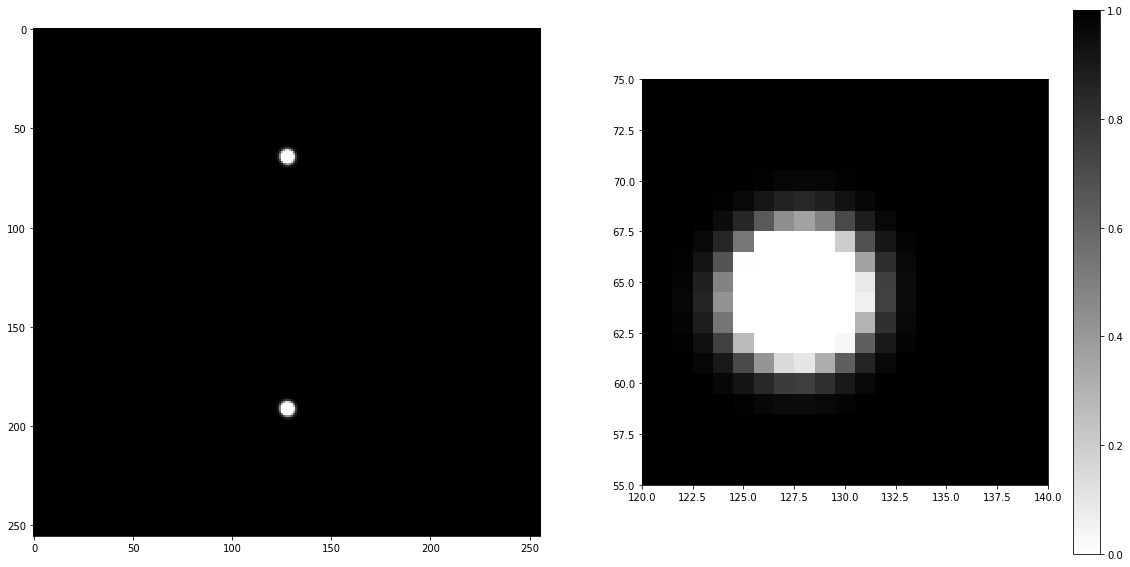

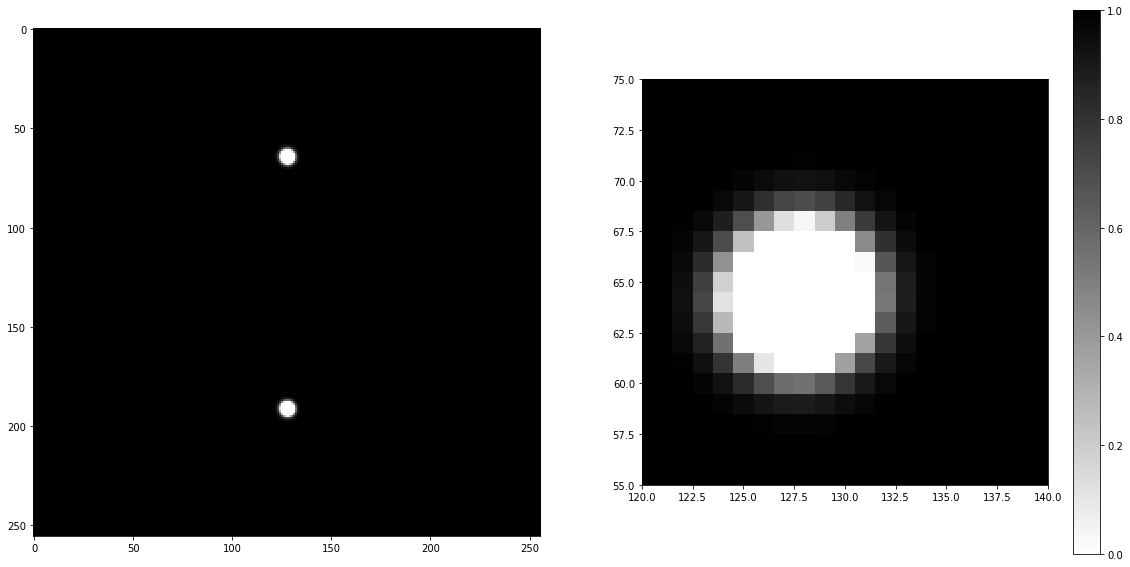

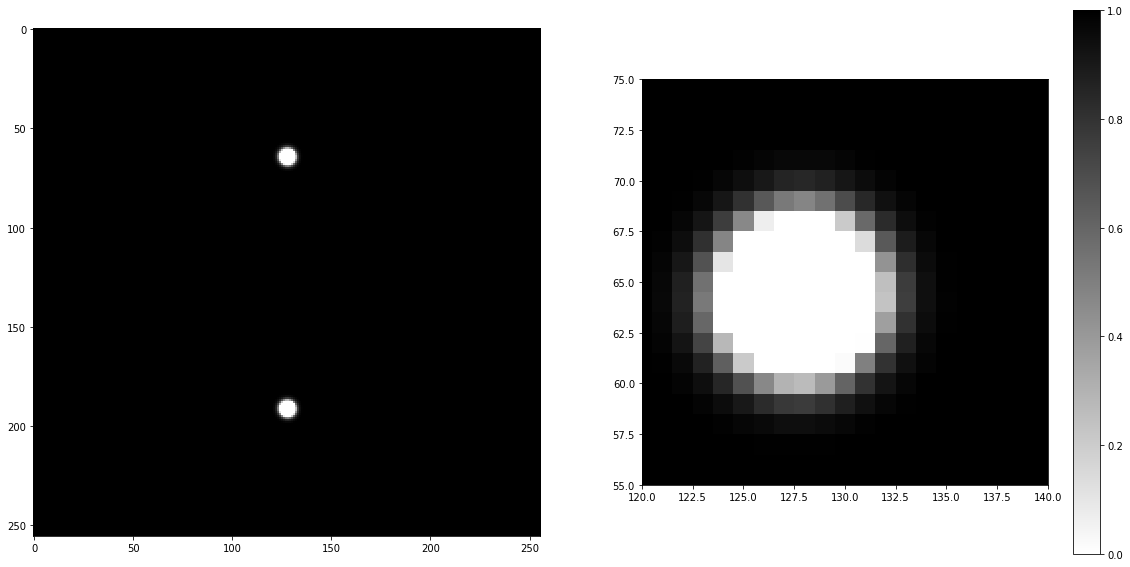

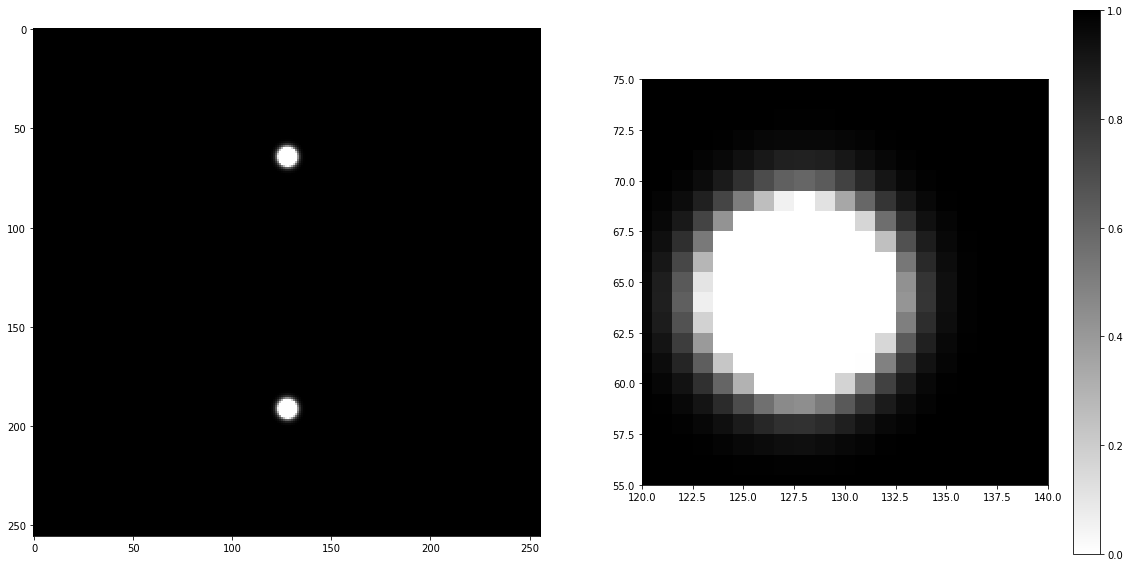

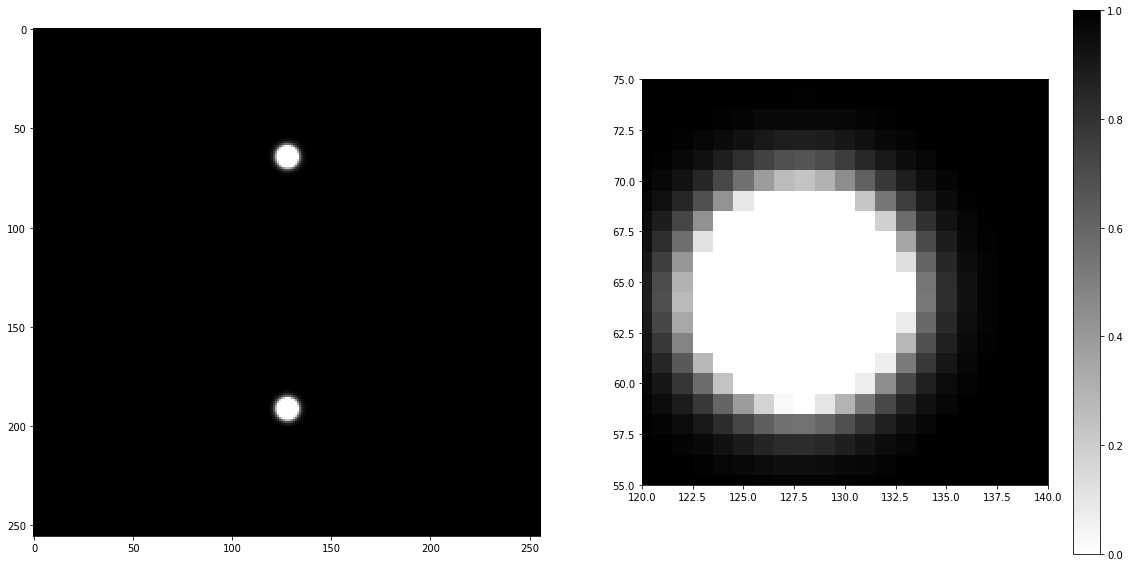

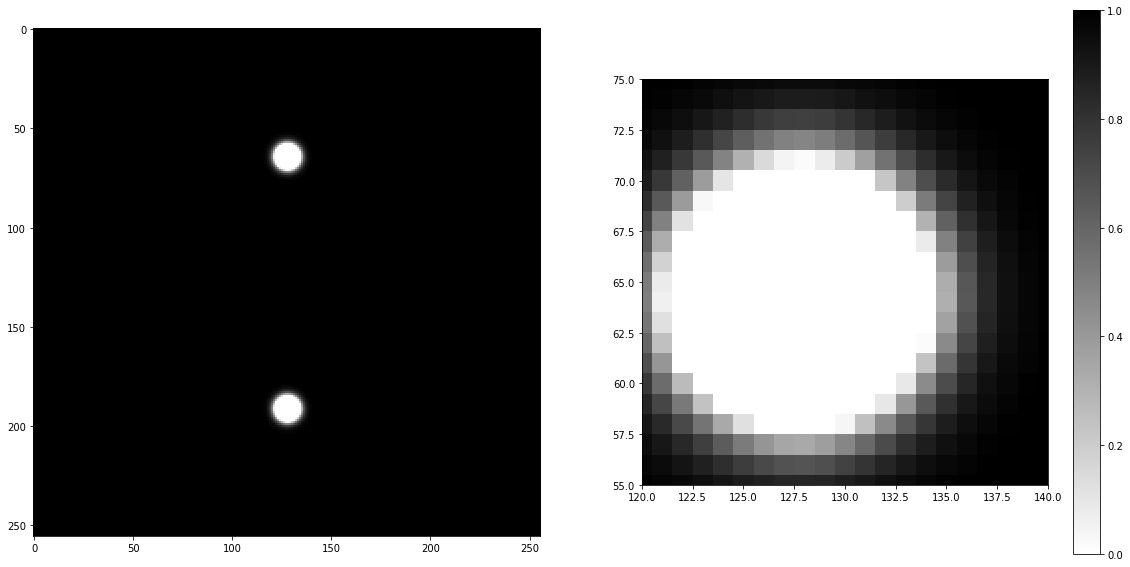

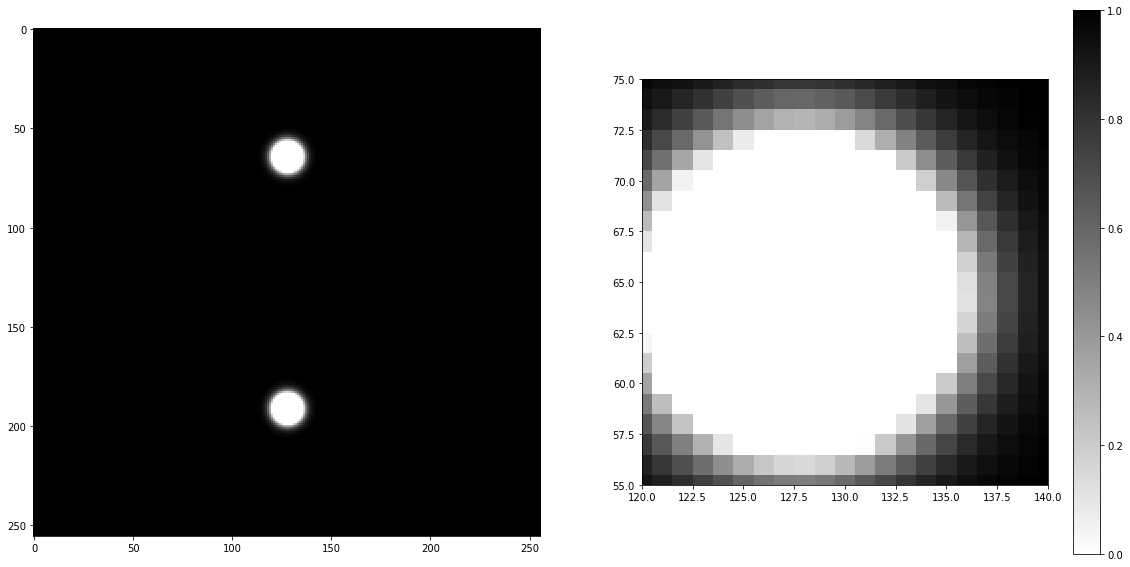

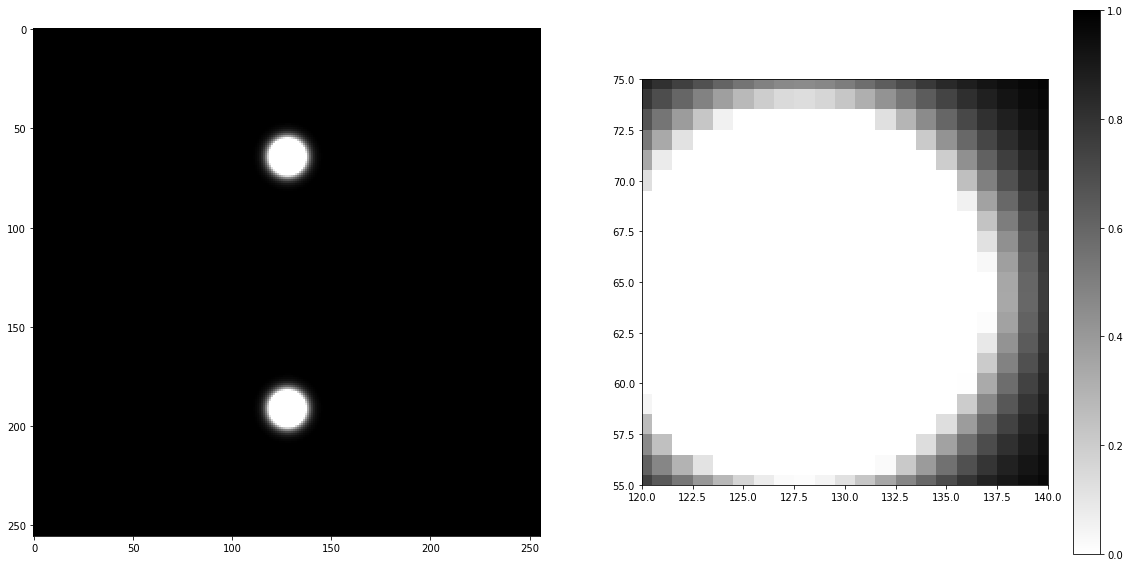

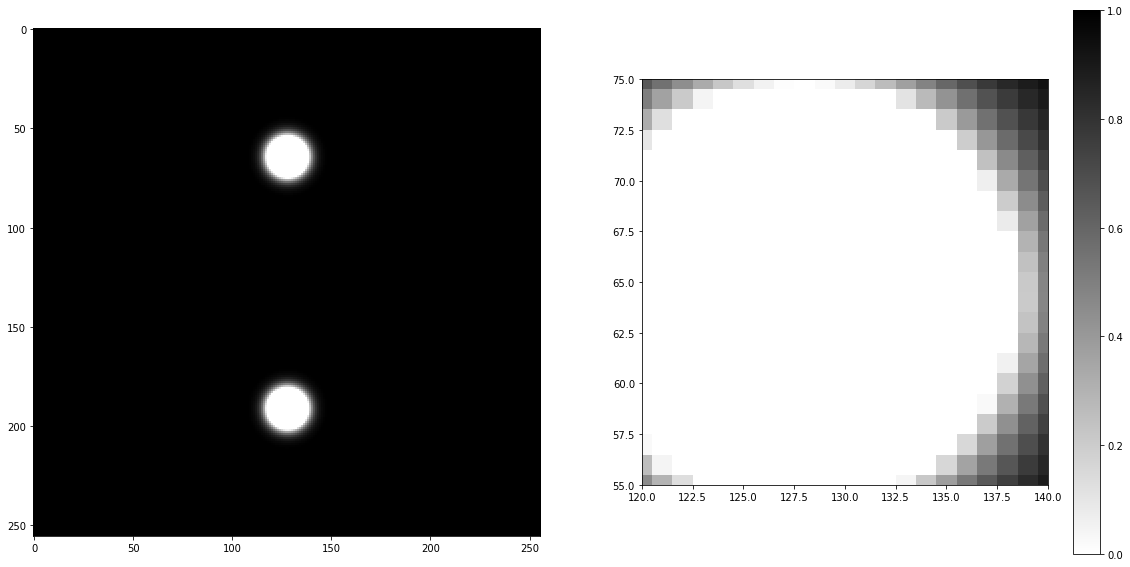

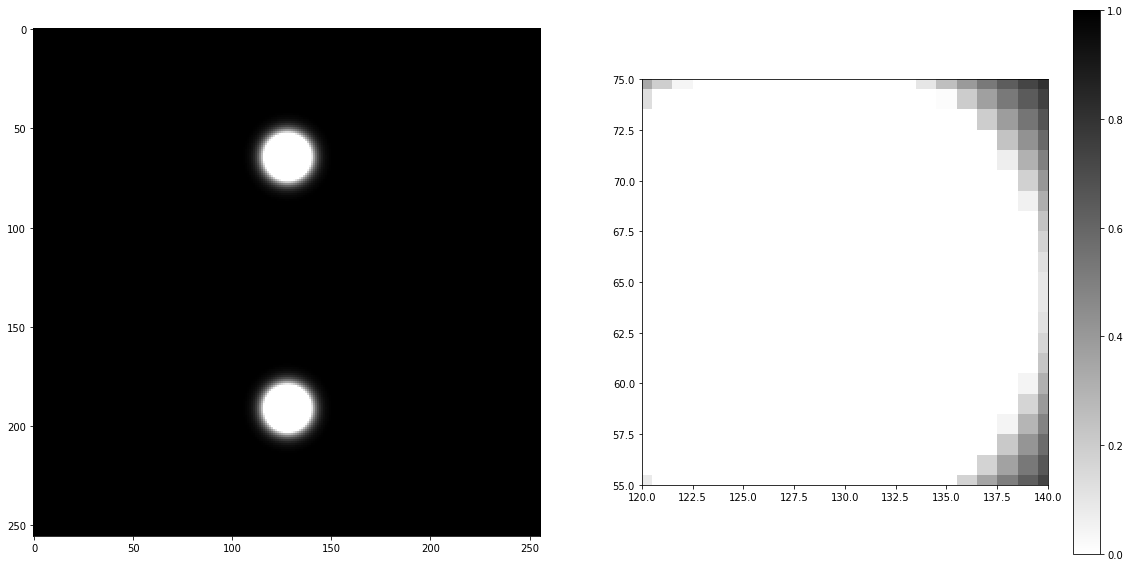

In [92]:
for st in lis:
    if (st[:3] == "W_G" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [93]:
pusG=[];
for st in lis:
    if (st[:3] == "W_G" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = pa.gm(f[mid],'sizeN')**3 - np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        pusG.append([(a == 0).sum(),(1-a).sum(),ma3D/(np.pi*256/2)])

pusG=np.array(pusG)

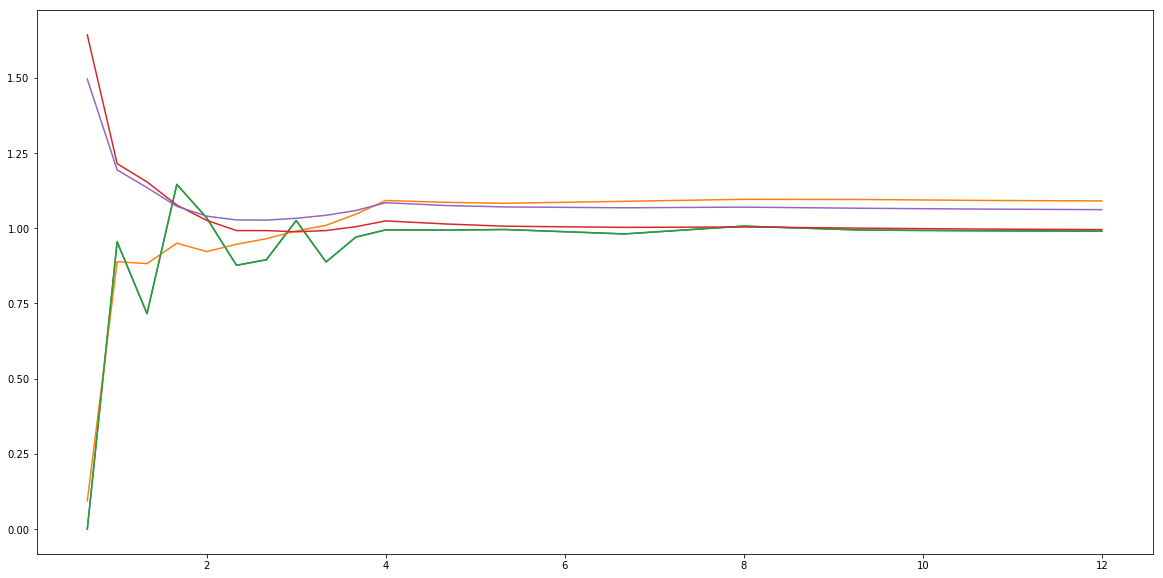

In [99]:
# REDO, Gau=Red, Gaus+tail
plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,1]/(1.5*2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,2]/(1.5*np.pi*(rsize/msa)**2))


# Diff

There are different types of diff; 

-full diff (produces ~spherical masks except for low values of r)

-semi diff (produces diffused cylindrical masks)

-diamond   (does not produce cylindrical masks)

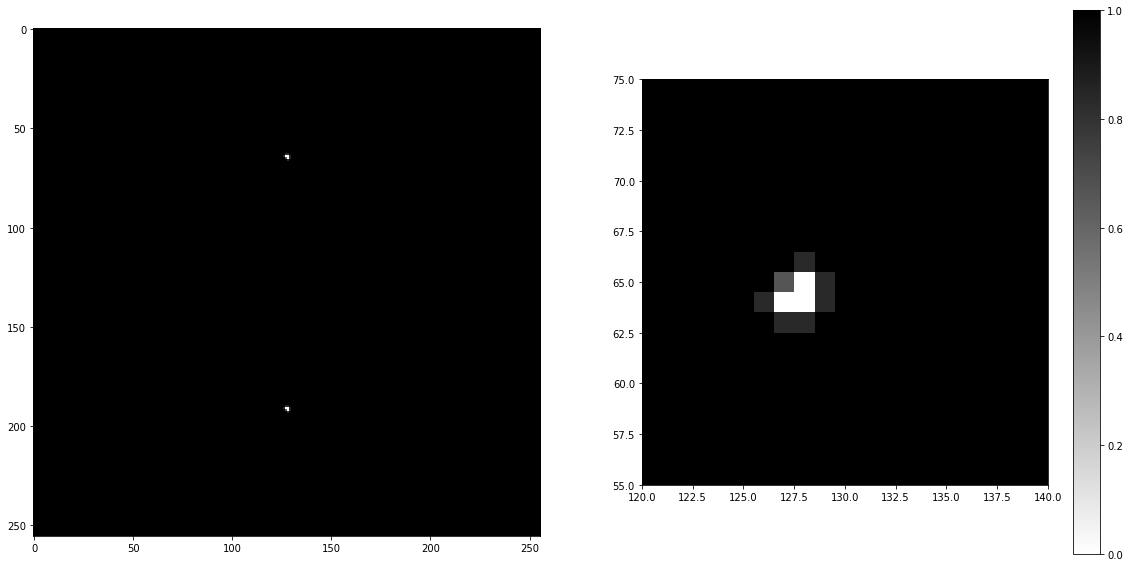

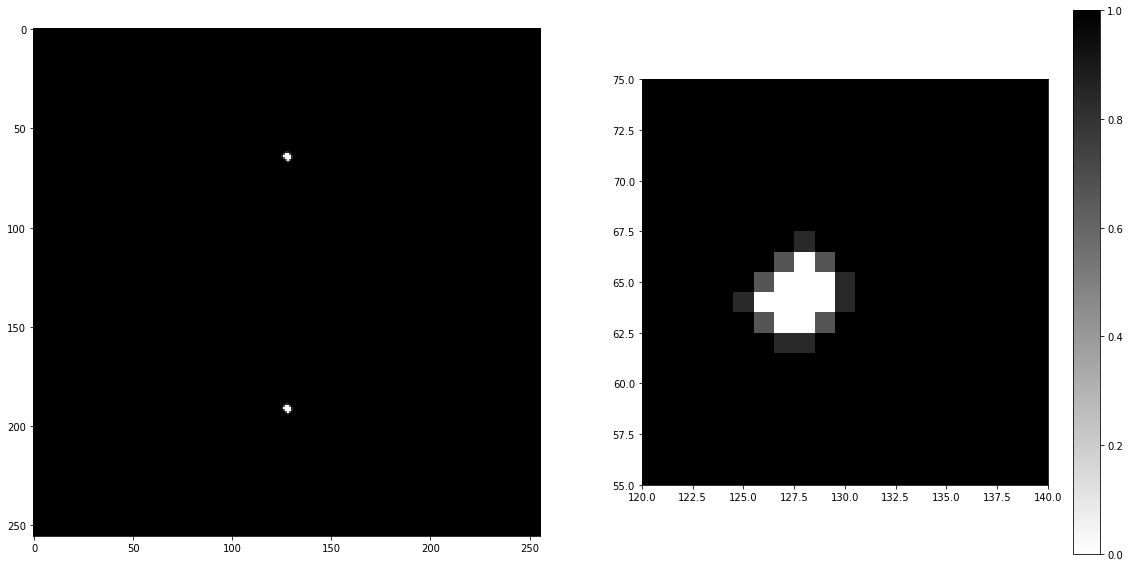

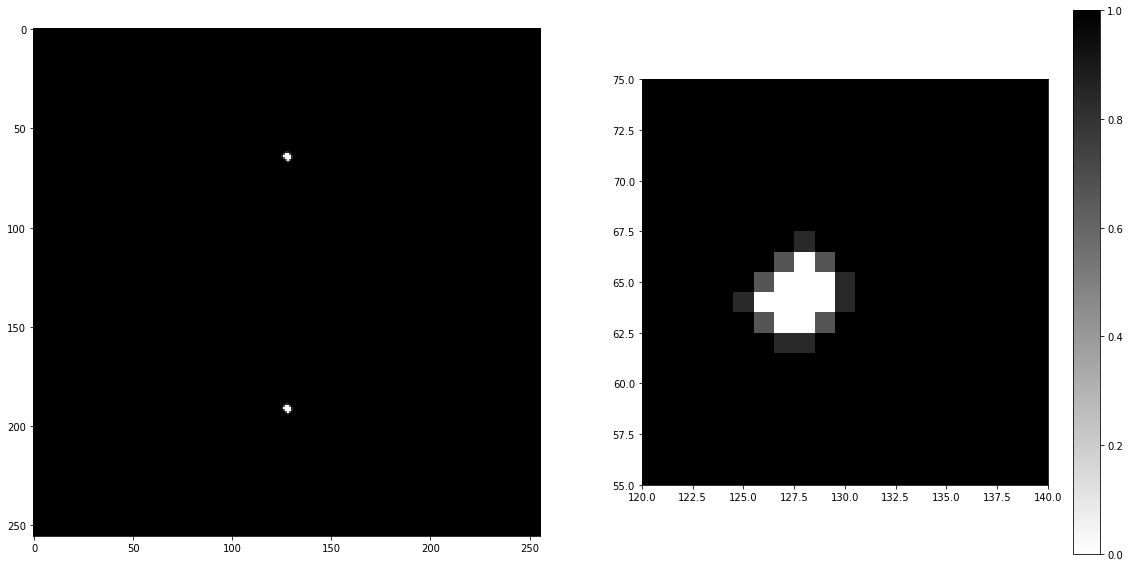

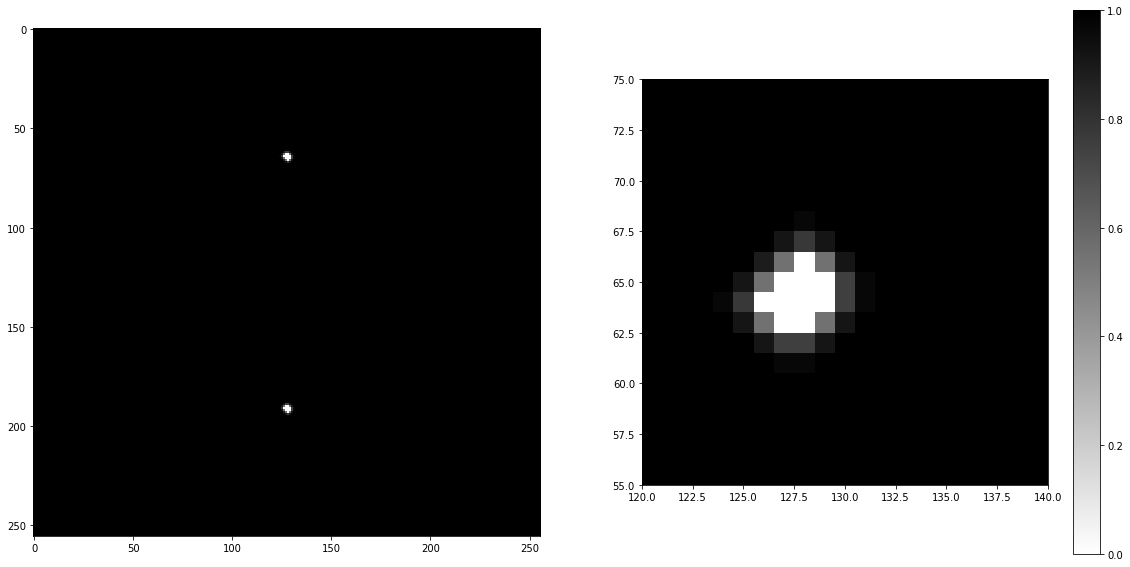

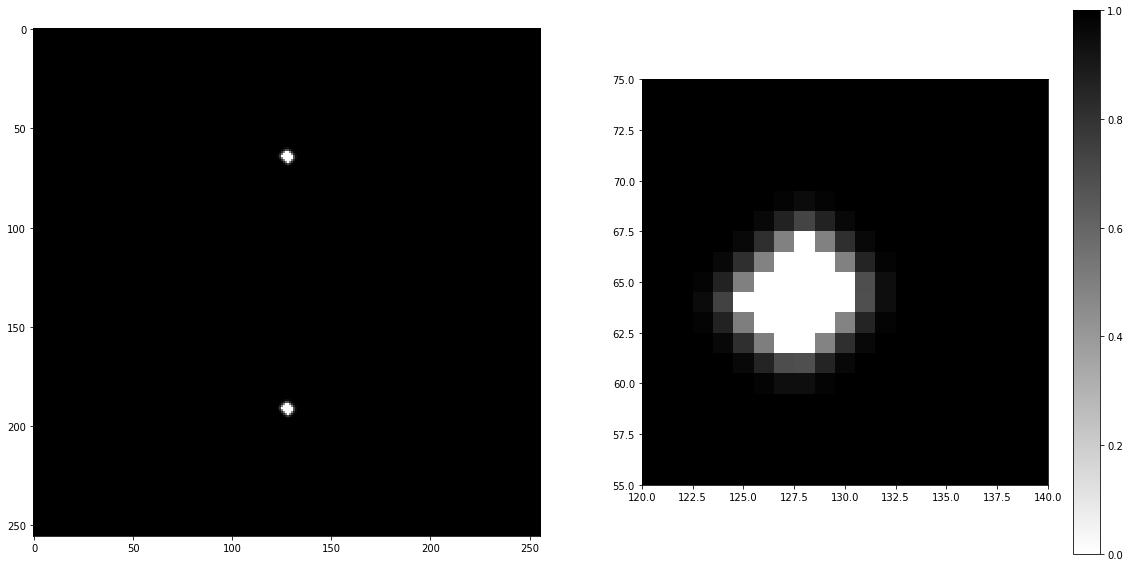

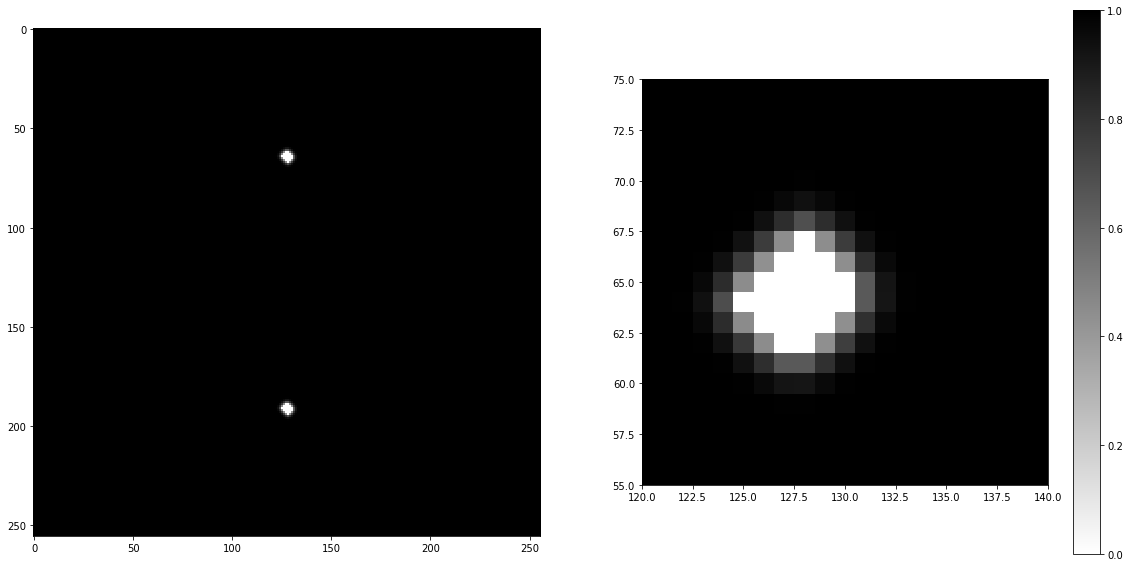

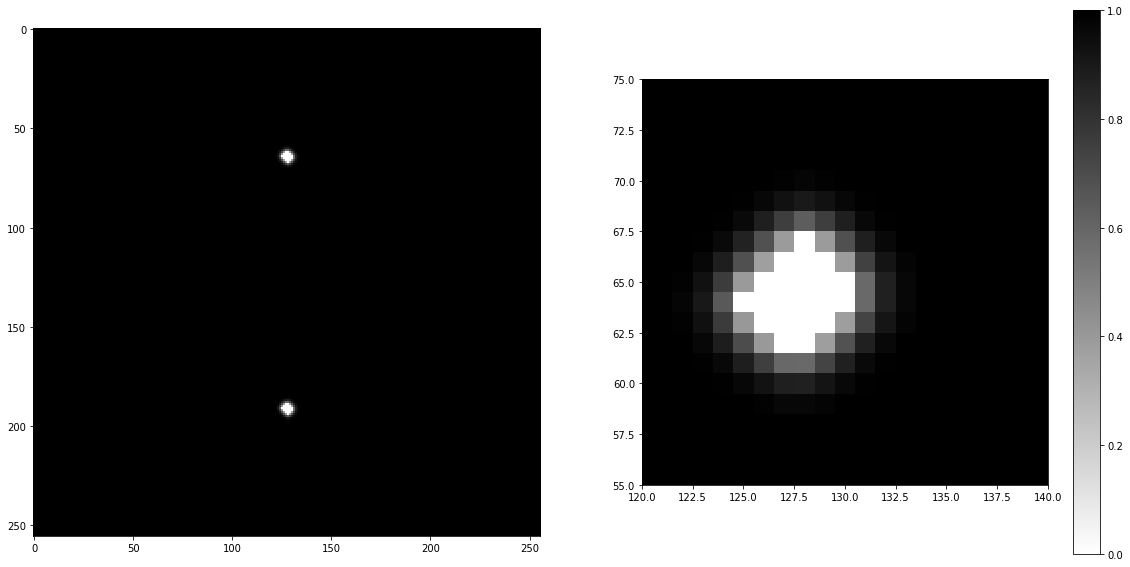

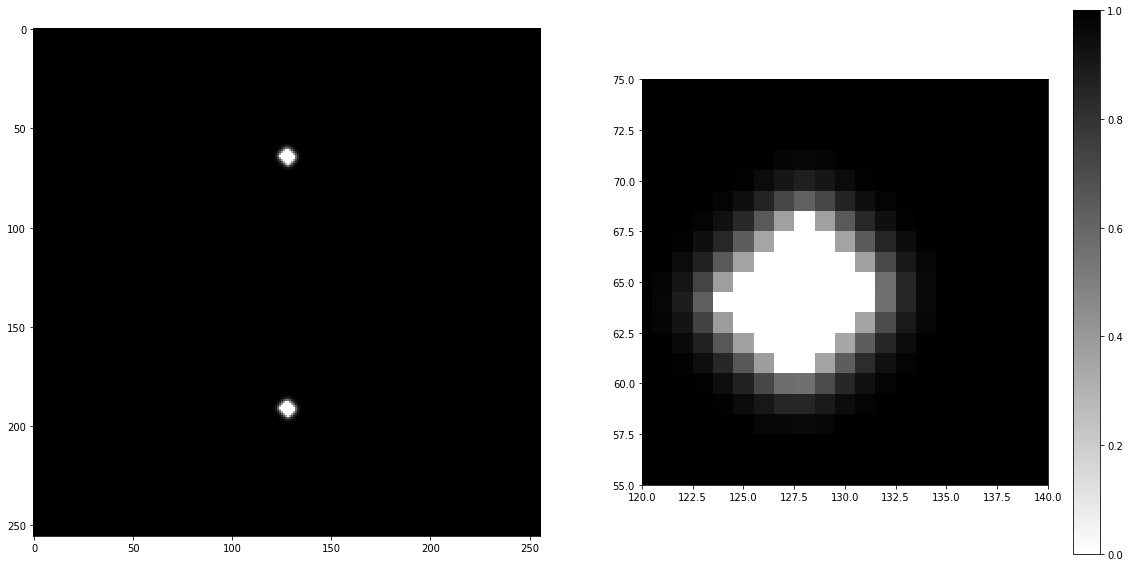

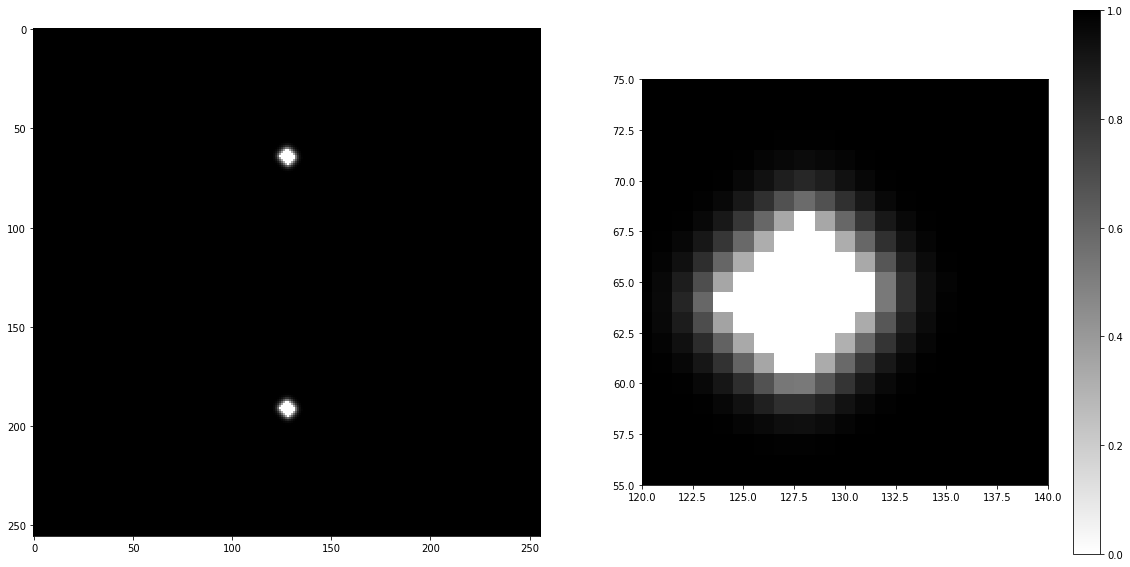

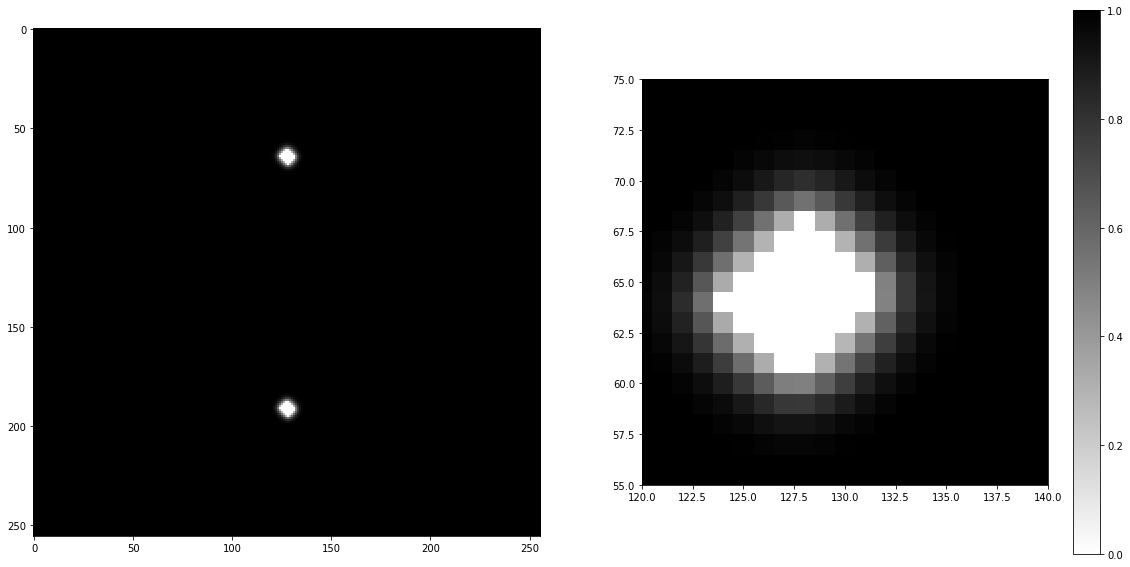

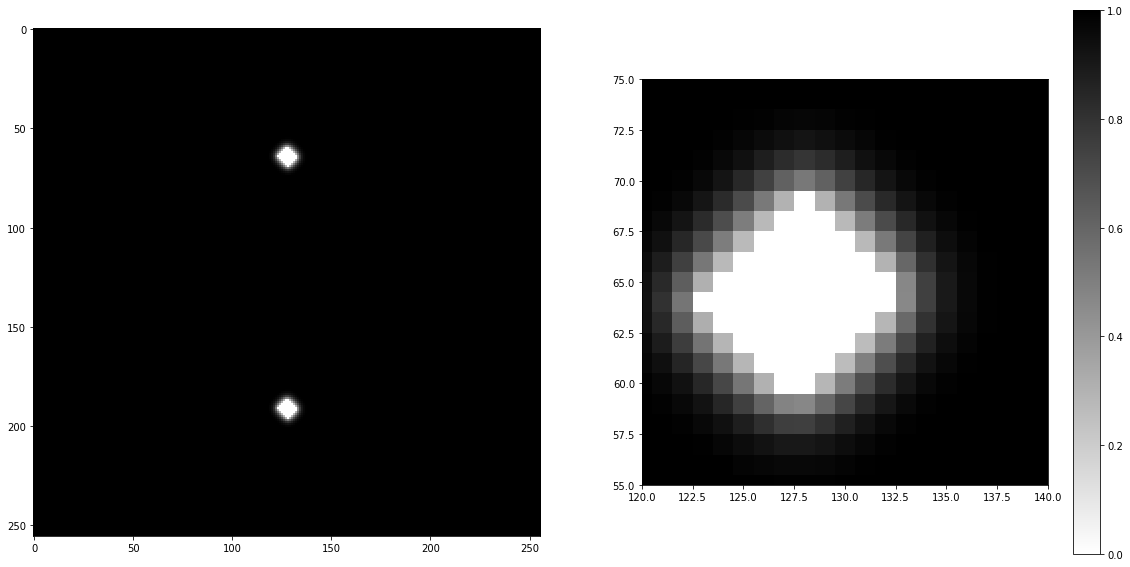

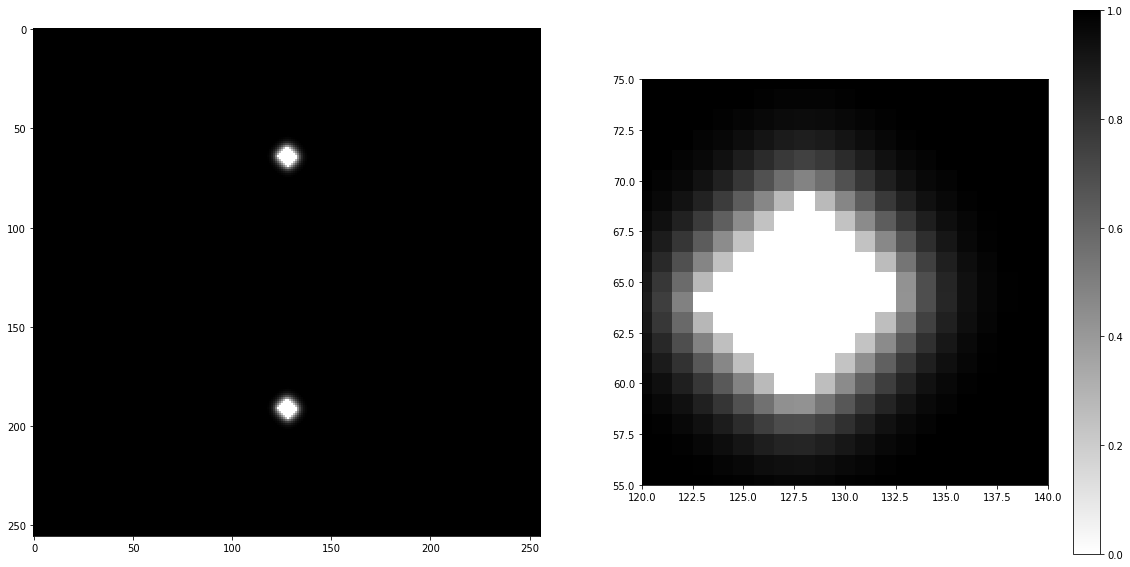

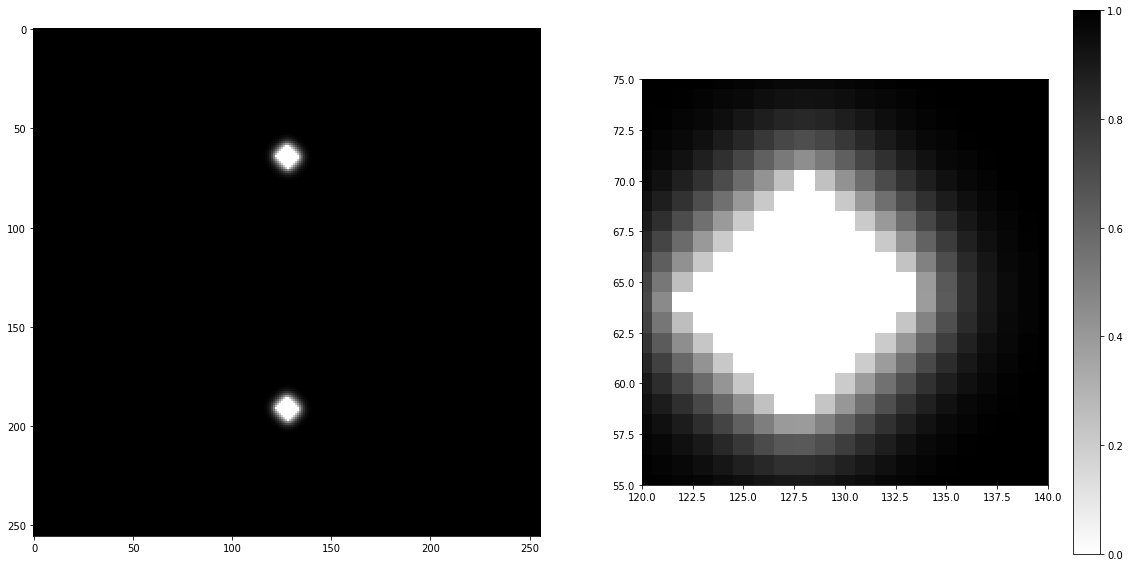

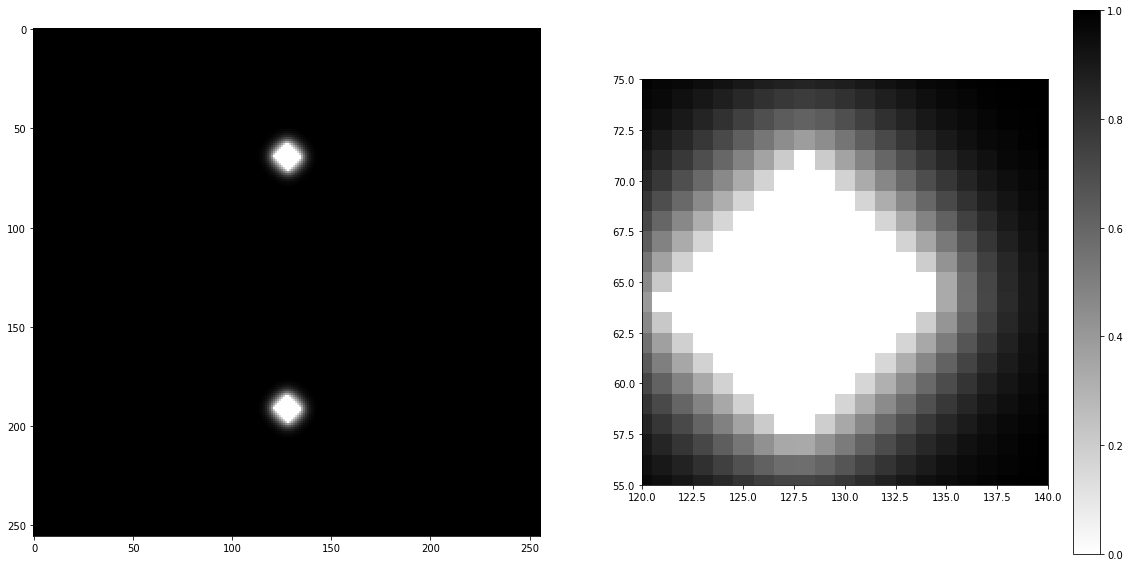

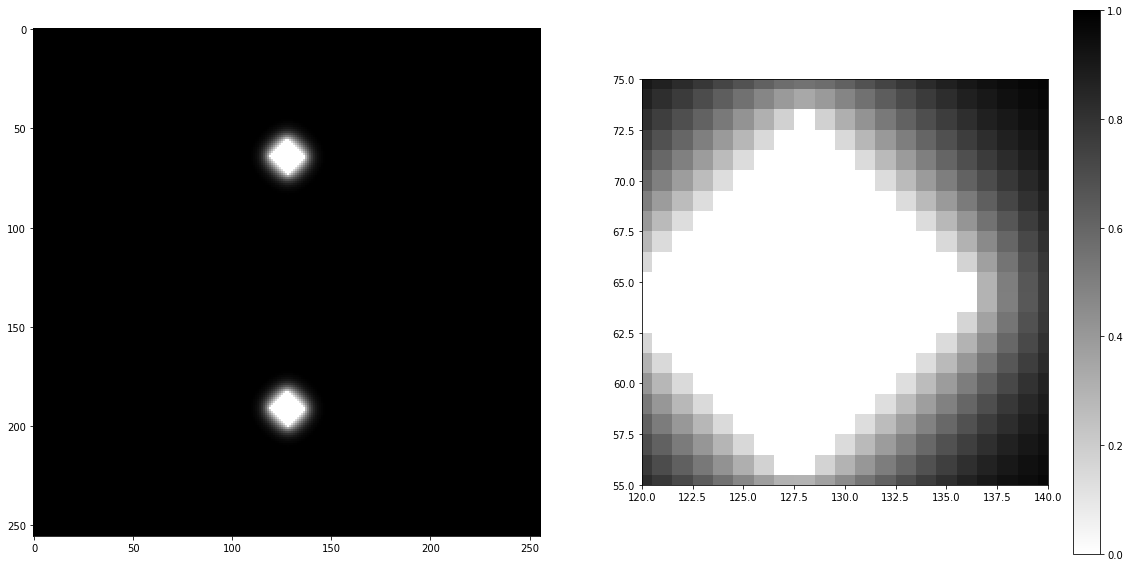

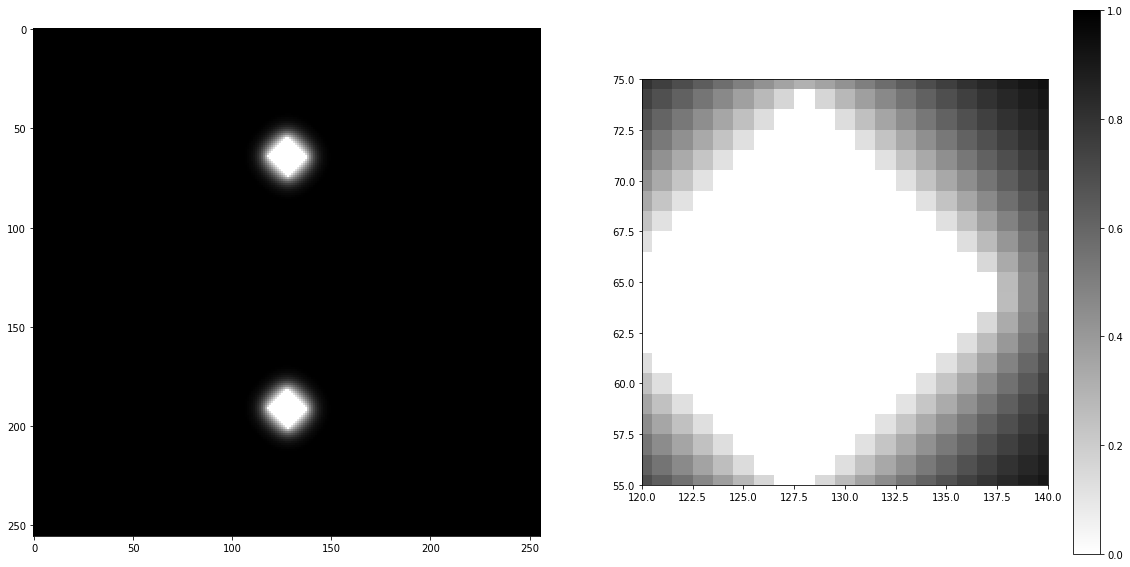

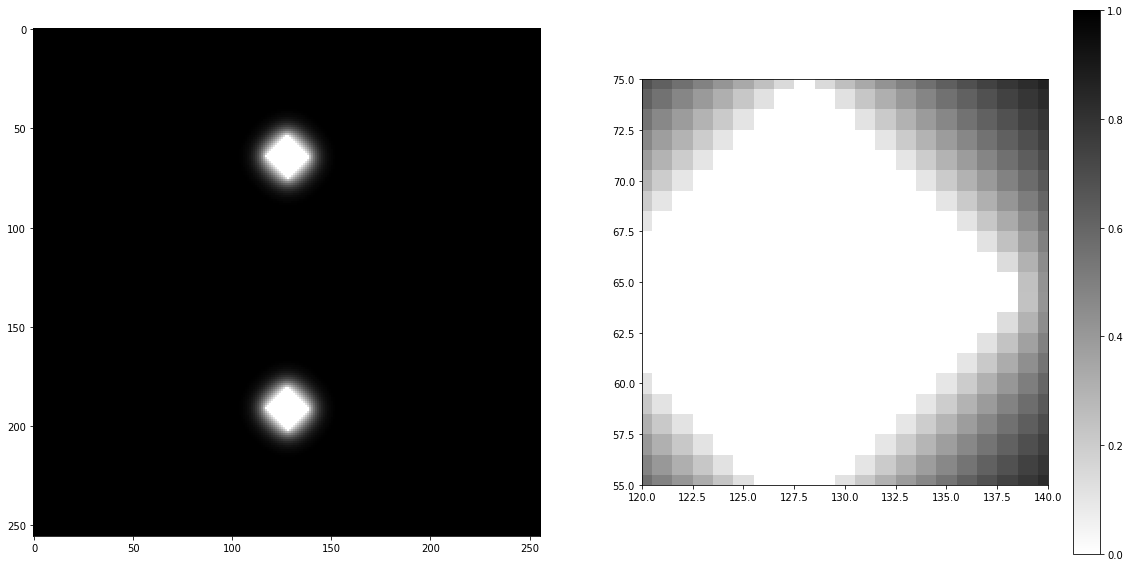

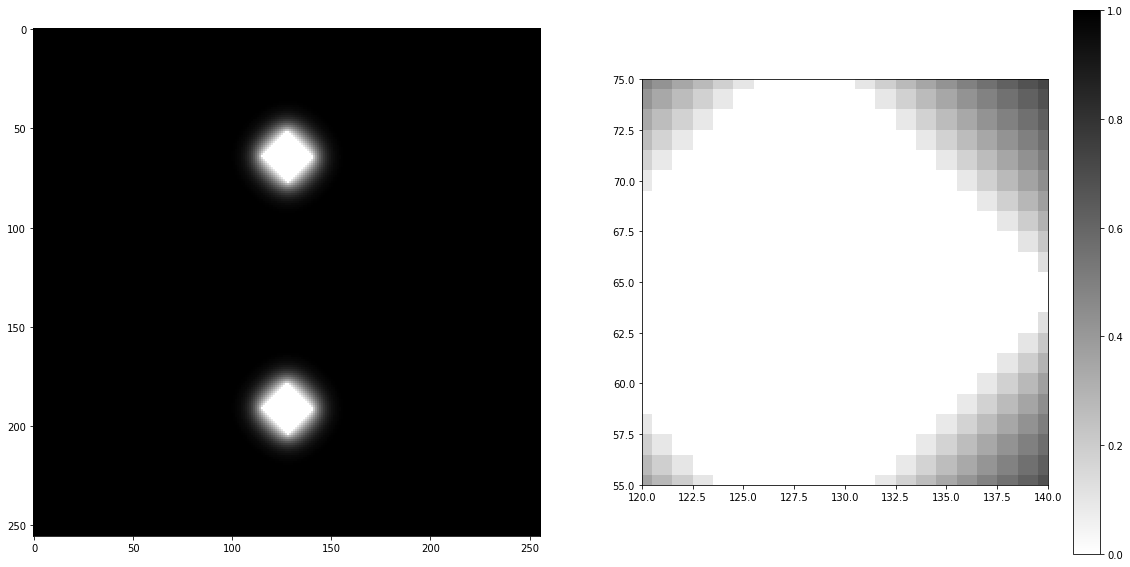

In [100]:
for st in lis:
    if (st[:3] == "W_D" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [23]:
pusD=[];
for st in lis:
    if (st[:3] == "W_D" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = pa.gm(f[mid],'sizeN')**3 - np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        pusD.append([(a == 0).sum(),(1-a).sum(),ma3D/(np.pi*256/2)])
pusD=np.array(pusD)

In [28]:
# semi diff, we expect something like 

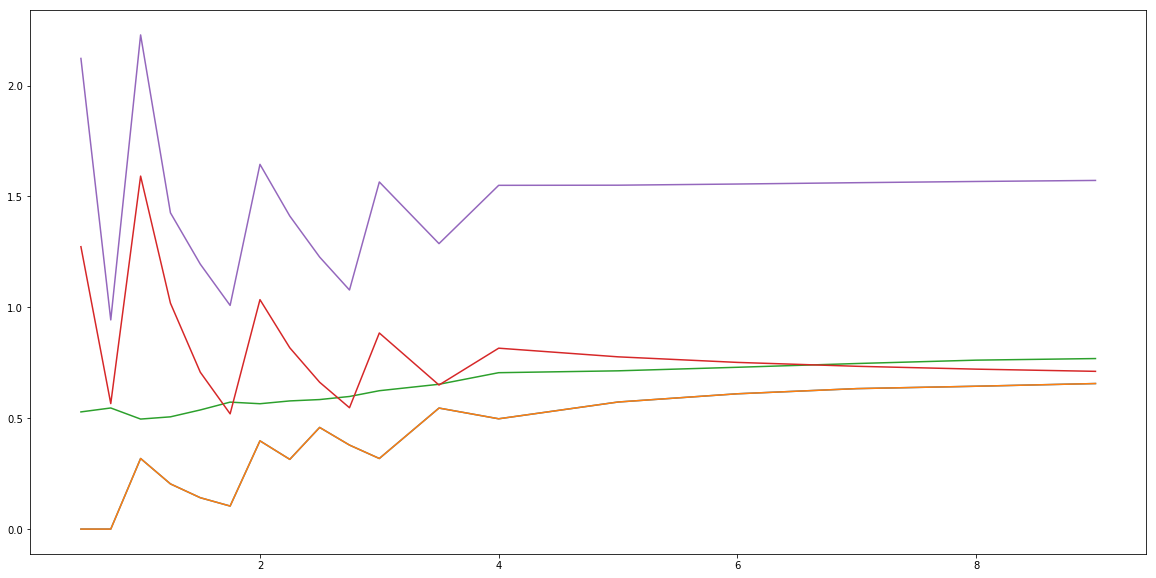

In [29]:
plt.plot(rsize/msa,pusR/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,1]/(1.5*2*np.pi*(rsize/msa)**2))

plt.plot(rsize/msa,pusD[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusD[:,1]/(2*np.pi*(rsize/msa)**2))

# Viladoro 

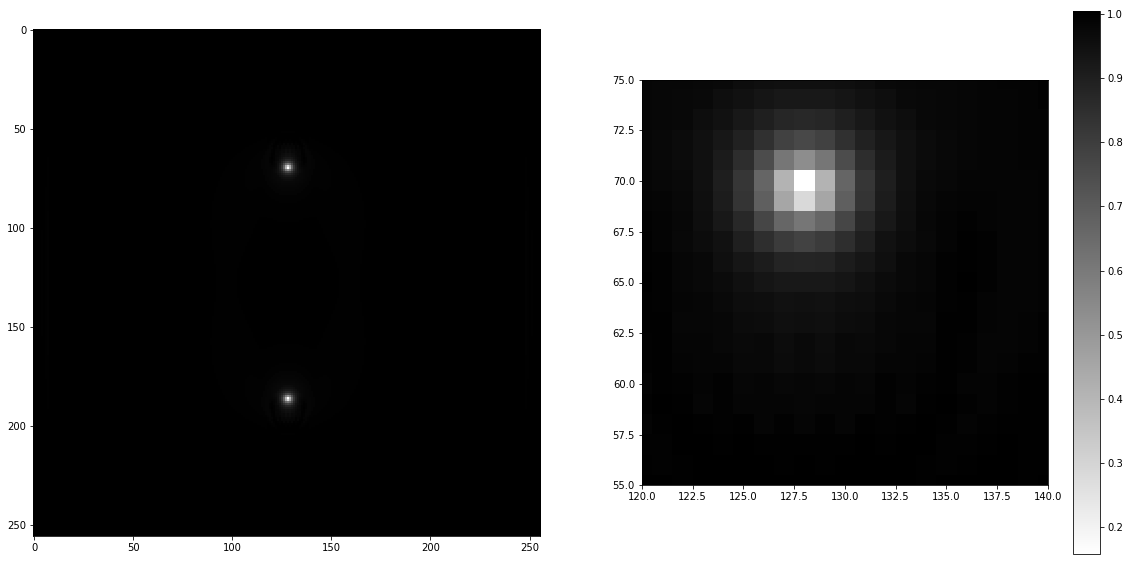

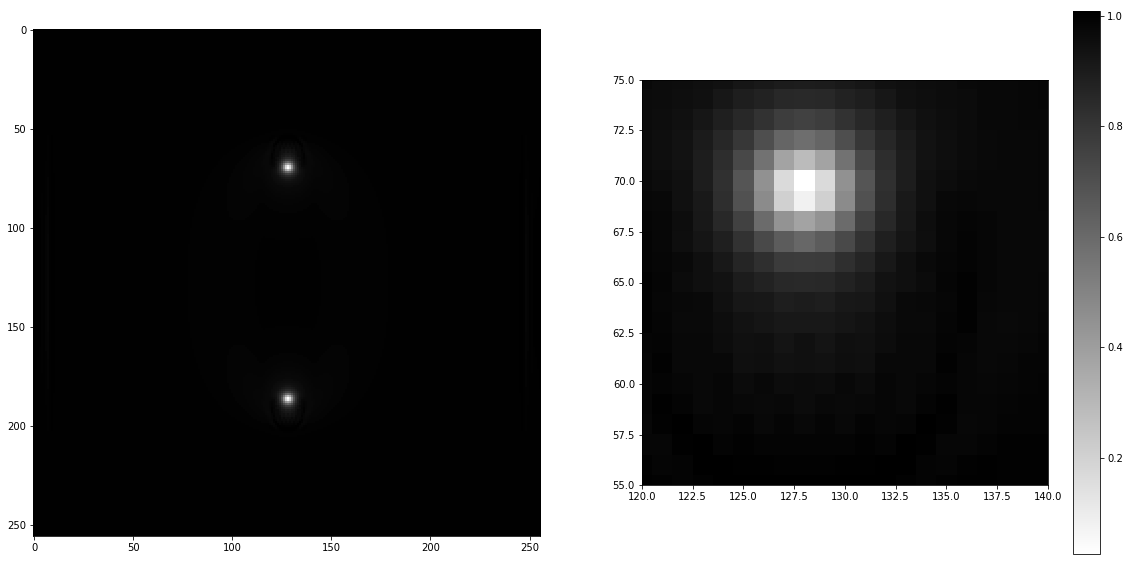

In [30]:
for st in lis:
    if (st[:4] == "W_Vi" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [31]:
pusV=[];
for st in lis:
    if (st[:3] == "W_V" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        pusV.append([(a == 0).sum(),(1-a).sum()])
pusV=np.array(pusV)

In [32]:
pusV

array([[  0.        ,  84.46526337],
       [  0.        , 158.54827881]])

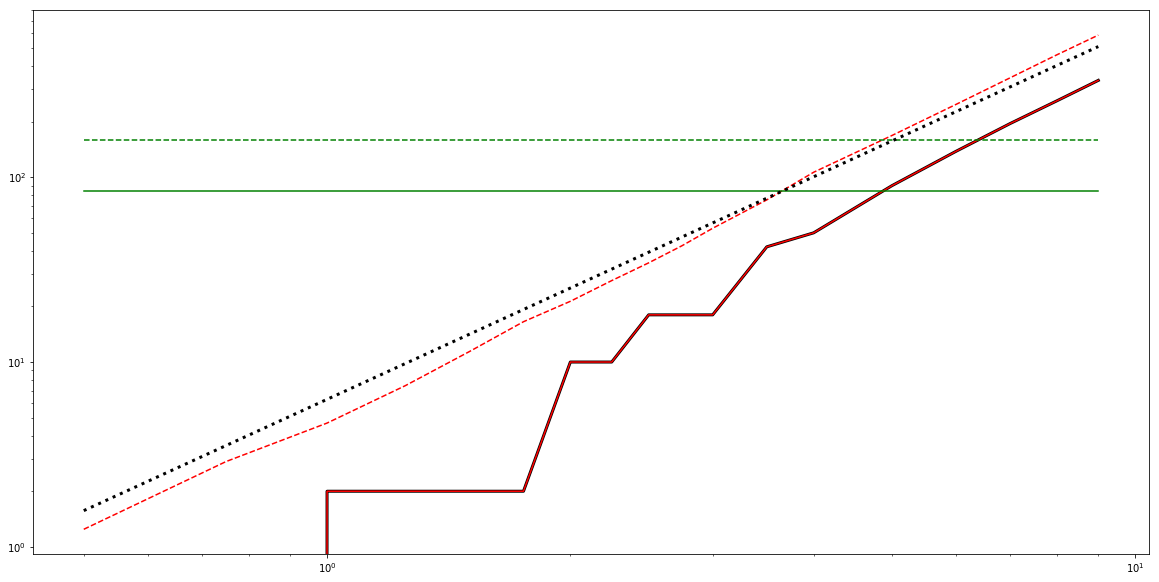

In [33]:
plt.loglog(rsize,pusR,'k',linewidth=3)
plt.loglog(rsize,pusG[:,0],'r')
plt.loglog(rsize,pusG[:,1],'r--')

# plt.loglog(rsize/msa,pusD[:,0],'b')
# plt.loglog(rsize/msa,pusD[:,1],'b--')

plt.loglog(rsize,pusV[0,1]*rsize/rsize,'g')
plt.loglog(rsize,pusV[1,1]*rsize/rsize,'g--')

plt.loglog(rsize,2*np.pi*(rsize/msa)**2,'k:',linewidth=3)